In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 203 data

### Reading the files and extracting relevant information:

In [3]:
plants = ["AV", "C", "D", "G", "M", "Y"]
xls_files = {}

for plant in plants:
    xls = pd.ExcelFile(
        f"../../../data/raw/203/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
        engine="openpyxl",
    )
    xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AV ['INSTRUÇÕES', '122', '24', '134', '50']
Palnt:  C ['INSTRUÇÕES', '114', '36', '144', '74', '54']
Palnt:  D ['INSTRUÇÕES', '10', '131', '117', '197', '8']
Palnt:  G ['INSTRUÇÕES', '3', '160', '49', '137', '2', '17', '142']
Palnt:  M ['INSTRUÇÕES', '147', '141', '159', '73', '170', '53', '135', '67', '161']
Palnt:  Y ['INSTRUÇÕES', '77', '151', '179', '136', '71', '113']


<IPython.core.display.Javascript object>

In [5]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [6]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   (Cidade, Unnamed: 1_level_2)                 19923 non-null  object 
 1   (Data, Produção)                             19511 non-null  object 
 2   (Horário, Produção)                          0 non-null      float64
 3   (Data, Medida)                               19511 non-null  object 
 4   (Horário, Medida)                            0 non-null      float64
 5   (Tipo de cimento, Unnamed: 6_level_2)        18674 non-null  object 
 6   (Classe de resistência, Unnamed: 7_level_2)  18674 non-null  object 
 7   (Obs., Unnamed: 8_level_2)                   3650 non-null   object 
dtypes: float64(2), object(6)
memory usage: 1.2+ MB


<IPython.core.display.Javascript object>

In [8]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      flo

<IPython.core.display.Javascript object>

In [9]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 1.1 MB


<IPython.core.display.Javascript object>

In [10]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                7857 non-null   float64
 1   MgO                18883 non-null  object 
 2   Na2O               18823 non-null  object 
 3   Al2O3              7859 non-null   float64
 4   SiO2               7859 non-null   float64
 5   SO3                18876 non-null  object 
 6   K2O                18205 non-null  object 
 7   TiO2               2843 non-null   float64
 8   Fe2O3              7810 non-null   float64
 9   Perda ao fogo      18831 non-null  object 
 10  Resíduo insolúvel  11760 non-null  object 
 11  Obs.               0 non-null      float64
dtypes: float64(6), object(6)
memory usage: 1.8+ MB


<IPython.core.display.Javascript object>

In [11]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 n

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [13]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            19331 non-null  object 
 1   (Unnamed: 137_level_1, #200)              17904 non-null  object 
 2   (Unnamed: 138_level_1, #325)              19170 non-null  object 
 3   (Unnamed: 139_level_1, #400)              0 non-null      float64
 4   (Unnamed: 140_level_1, Massa específica)  6921 non-null   object 
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 947.1+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           18883 non-null  object 
 1   (Tempo de pega, Fim)              18467 non-null  object 
 2   (Resistência à compressão, 1 d)   18909 non-null  object 
 3   (Resistência à compressão, 3 d)   14713 non-null  float64
 4   (Resistência à compressão, 7 d)   18847 non-null  object 
 5   (Resistência à compressão, 28 d)  18614 non-null  object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

In [15]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [16]:
df = pd.concat(
    [
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [17]:
COLUMNS_TO_DROP = [
    ("Data", "Produção"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Cidade", "Unnamed: 1_level_2"): "Plant",
    ("Data", "Medida"): "Date",
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Final setting time",
    ("Tempo de pega", "Fim"): "Initial setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

# Preprocessing
df["Cement_Type"] = df["Cement_Type"].replace("FIBROCMENTO", "Fibrocimento")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIEnsacado", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIGranel", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Ensacado", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Granel", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIRS", "CP VARI")

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [18]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '1..10'
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: '             '
could not convert string to float: '  '
could not convert string to float: ' '
could not convert string to float: '1.6.0'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
coul

<IPython.core.display.Javascript object>

In [19]:
df = df[df["Plant"] == "M"].reset_index(drop=True)

<IPython.core.display.Javascript object>

# EDA

In [20]:
df.shape

(6233, 24)

<IPython.core.display.Javascript object>

In [21]:
df.head()

Plant       Date  CaO   MgO  Na2O  Al2O3  SiO2   SO3  K2O  TiO2  ...  #200  \
0     M 2011-05-09  NaN  1.29  0.07    NaN   NaN  2.50  NaN   NaN  ...   NaN   
1     M 2011-05-10  NaN  1.29  0.07    NaN   NaN  2.69  NaN   NaN  ...   NaN   
2     M 2011-05-12  NaN  1.28  0.07    NaN   NaN  2.84  NaN   NaN  ...   NaN   
3     M 2011-05-13  NaN  1.27  0.07    NaN   NaN  2.37  NaN   NaN  ...   NaN   
4     M 2011-05-14  NaN  1.28  0.07    NaN   NaN  2.19  NaN   NaN  ...  1.68   

    #325  Specific Gravity  Final setting time  Initial setting time   CS1  \
0  16.50              3.09               160.0                 205.0  17.1   
1  13.30               NaN               170.0                 220.0  16.0   
2  16.10               NaN               185.0                 230.0  18.6   
3  13.60               NaN               170.0                 230.0  18.8   
4  12.64               NaN                 NaN                   NaN  18.5   

    CS3   CS7  CS28  Cement_Type  
0  28.2  34.1  40.4    CP II-F32  
1  26.7  32.7  41.2    CP II-F32  
2  31.9  33.8  40.8    CP II-F32  
3  31.4  34.5  44.0    CP II-F32  
4  31.0  37.0  44.6    CP II-F32  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [22]:
df.tail()

Plant       Date  CaO   MgO  Na2O  Al2O3  SiO2   SO3   K2O  TiO2  ...  \
6228     M 2023-04-10  NaN  1.54  0.07    NaN   NaN  3.87  0.91   NaN  ...   
6229     M 2023-04-12  NaN  1.50  0.07    NaN   NaN  4.00  0.92   NaN  ...   
6230     M 2023-04-17  NaN  1.51  0.07    NaN   NaN  4.08  0.91   NaN  ...   
6231     M 2023-04-19  NaN  1.51  0.07    NaN   NaN  4.04  0.90   NaN  ...   
6232     M 2023-04-24  NaN  1.47  0.07    NaN   NaN  3.82  0.89   NaN  ...   

      #200  #325  Specific Gravity  Final setting time  Initial setting time  \
6228   NaN  2.37               NaN               130.0                 190.0   
6229   NaN  1.96               NaN               125.0                 185.0   
6230   NaN  2.34               NaN               140.0                 200.0   
6231   NaN  1.80               NaN               145.0                 205.0   
6232   NaN  1.75               NaN               135.0                 195.0   

       CS1   CS3   CS7  CS28  Cement_Type  
6228  28.3  38.9  45.1   NaN      CP VARI  
6229  29.6   NaN  46.6   NaN      CP VARI  
6230  27.0  38.2  45.2   NaN      CP VARI  
6231  27.8   NaN   NaN   NaN      CP VARI  
6232  28.1   NaN   NaN   NaN      CP VARI  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6233 entries, 0 to 6232
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 6233 non-null   object        
 1   Date                  6233 non-null   datetime64[ns]
 2   CaO                   0 non-null      float64       
 3   MgO                   6144 non-null   float64       
 4   Na2O                  6089 non-null   float64       
 5   Al2O3                 0 non-null      float64       
 6   SiO2                  0 non-null      float64       
 7   SO3                   6144 non-null   float64       
 8   K2O                   5466 non-null   float64       
 9   TiO2                  0 non-null      float64       
 10  Fe2O3                 0 non-null      float64       
 11  Loss on Ignition      6144 non-null   float64       
 12  Insoluble Residue     2674 non-null   float64       
 13  Blaine            

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [24]:
df.dtypes.value_counts()

float64           21
object             2
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [25]:
df.describe().transpose()

count                           mean  \
Date                    6233  2017-01-09 15:57:23.732392192   
CaO                      0.0                            NaN   
MgO                   6144.0                       1.785913   
Na2O                  6089.0                        0.08291   
Al2O3                    0.0                            NaN   
SiO2                     0.0                            NaN   
SO3                   6144.0                       2.663129   
K2O                   5466.0                       0.945513   
TiO2                     0.0                            NaN   
Fe2O3                    0.0                            NaN   
Loss on Ignition      6144.0                       4.222251   
Insoluble Residue     2674.0                       2.245194   
Blaine                6211.0                    4387.279343   
#200                  4786.0                       0.534206   
#325                  6150.0                        3.52811   
Specific Gravity       953.0                       3.041654   
Final setting time    6192.0                     173.333656   
Initial setting time  6193.0                     231.039803   
CS1                   6231.0                      19.320203   
CS3                   4452.0                      30.581264   
CS7                   6212.0                      37.614675   
CS28                  6148.0                      48.481661   

                                      min                  25%  \
Date                  1900-01-24 01:26:24  2014-01-31 00:00:00   
CaO                                   NaN                  NaN   
MgO                                  0.87                  1.4   
Na2O                                  0.0                 0.07   
Al2O3                                 NaN                  NaN   
SiO2                                  NaN                  NaN   
SO3                                  0.09                 2.31   
K2O                                  0.07                 0.79   
TiO2                                  NaN                  NaN   
Fe2O3                                 NaN                  NaN   
Loss on Ignition                     0.46                 3.45   
Insoluble Residue                    0.23                 0.92   
Blaine                             3085.0               4195.0   
#200                                  0.0                 0.06   
#325                                  0.0                  1.0   
Specific Gravity                     2.94                 3.01   
Final setting time                   45.0                150.0   
Initial setting time                 20.5                205.0   
CS1                                   5.3                 12.7   
CS3                                  11.8                 23.4   
CS7                                  16.7                 29.4   
CS28                                 28.4                 40.7   

                                      50%                  75%  \
Date                  2016-12-07 00:00:00  2019-11-01 00:00:00   
CaO                                   NaN                  NaN   
MgO                                  1.81                 2.08   
Na2O                                 0.08                 0.09   
Al2O3                                 NaN                  NaN   
SiO2                                  NaN                  NaN   
SO3                                   2.6                 2.98   
K2O                                  0.89                 1.04   
TiO2                                  NaN                  NaN   
Fe2O3                                 NaN                  NaN   
Loss on Ignition                     4.06                  5.1   
Insoluble Residue                    1.46               2.9275   
Blaine                             4445.0               4624.0   
#200                                 0.17               0.4475   
#325                                 2.07                 4.11  

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [26]:
df.describe(exclude="number").T

count unique      top  freq                           mean  \
Plant        6233      1        M  6233                            NaN   
Date         6233    NaN      NaN   NaN  2017-01-09 15:57:23.732392192   
Cement_Type  6233      8  CP VARI  2556                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
Date         1900-01-24 01:26:24  2014-01-31 00:00:00  2016-12-07 00:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
Date         2019-11-01 00:00:00  2023-04-24 00:00:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [27]:
df["Plant"].unique()

array(['M'], dtype=object)

<IPython.core.display.Javascript object>

In [28]:
df["Cement_Type"].unique()

array(['CP II-F32', 'CP II-Z32', 'CP II-E32', 'CP IV32', 'CP III32',
       'CP II-F40', 'CP II-E40', 'CP VARI'], dtype=object)

<IPython.core.display.Javascript object>

In [29]:
df["Plant"].value_counts()

Plant
M    6233
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
df["Cement_Type"].value_counts()

Cement_Type
CP VARI      2556
CP II-E40    1355
CP IV32       824
CP II-E32     694
CP II-Z32     316
CP II-F32     303
CP III32      121
CP II-F40      64
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

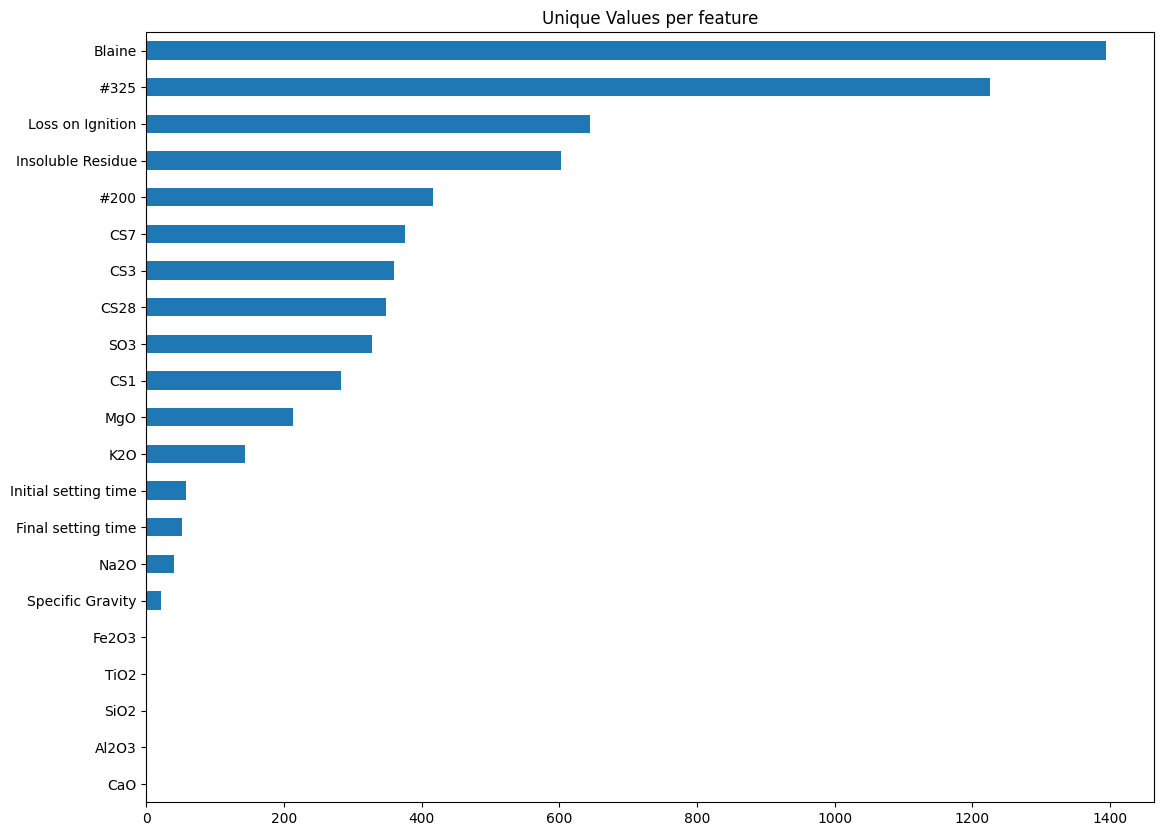

<IPython.core.display.Javascript object>

In [32]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'Cement_Type'), Text(2, 0, 'Date')])

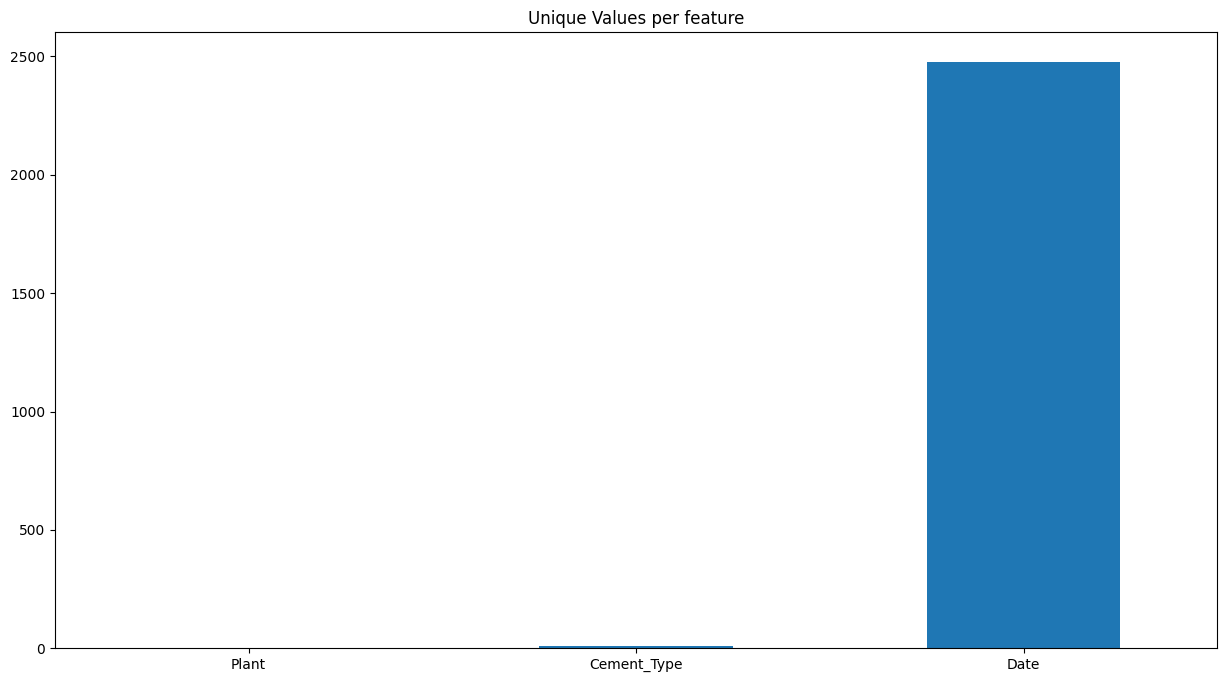

<IPython.core.display.Javascript object>

In [33]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Plant'), Text(1, 0, 'Cement_Type')])

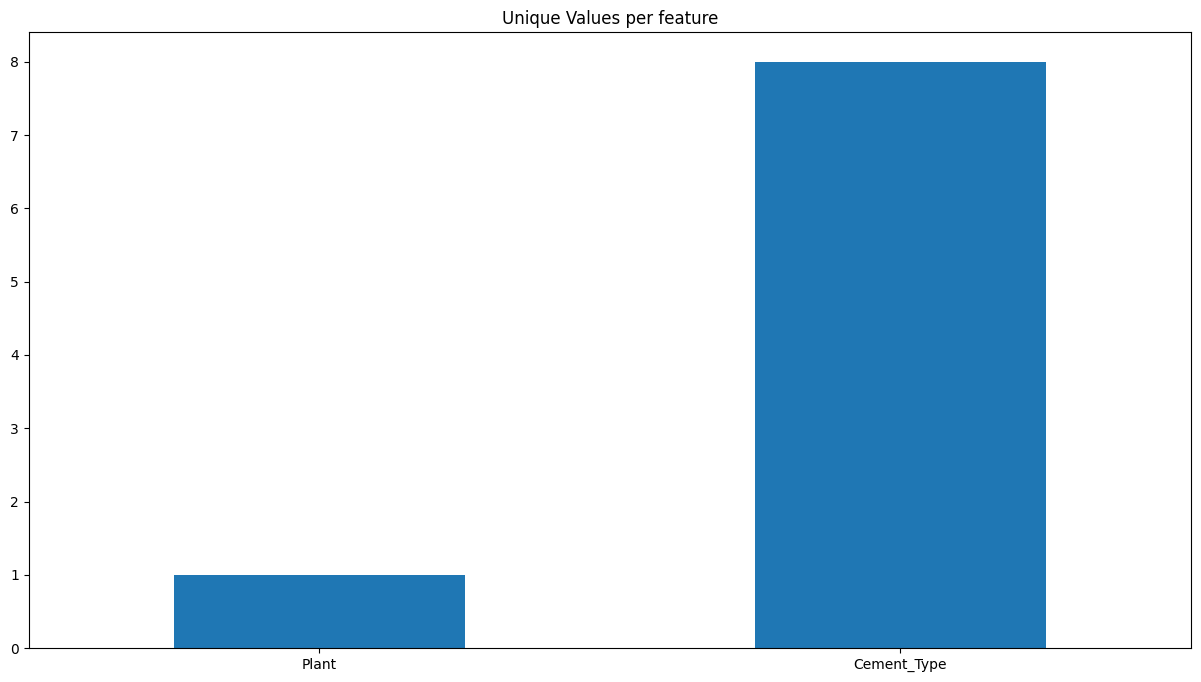

<IPython.core.display.Javascript object>

In [34]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [35]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 21 variables with missing values from a total of 24


<IPython.core.display.Javascript object>

In [36]:
df.isna().any()

Plant                   False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                   True
#200                     True
#325                     True
Specific Gravity         True
Final setting time       True
Initial setting time     True
CS1                      True
CS3                      True
CS7                      True
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [37]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [38]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 24 artists>

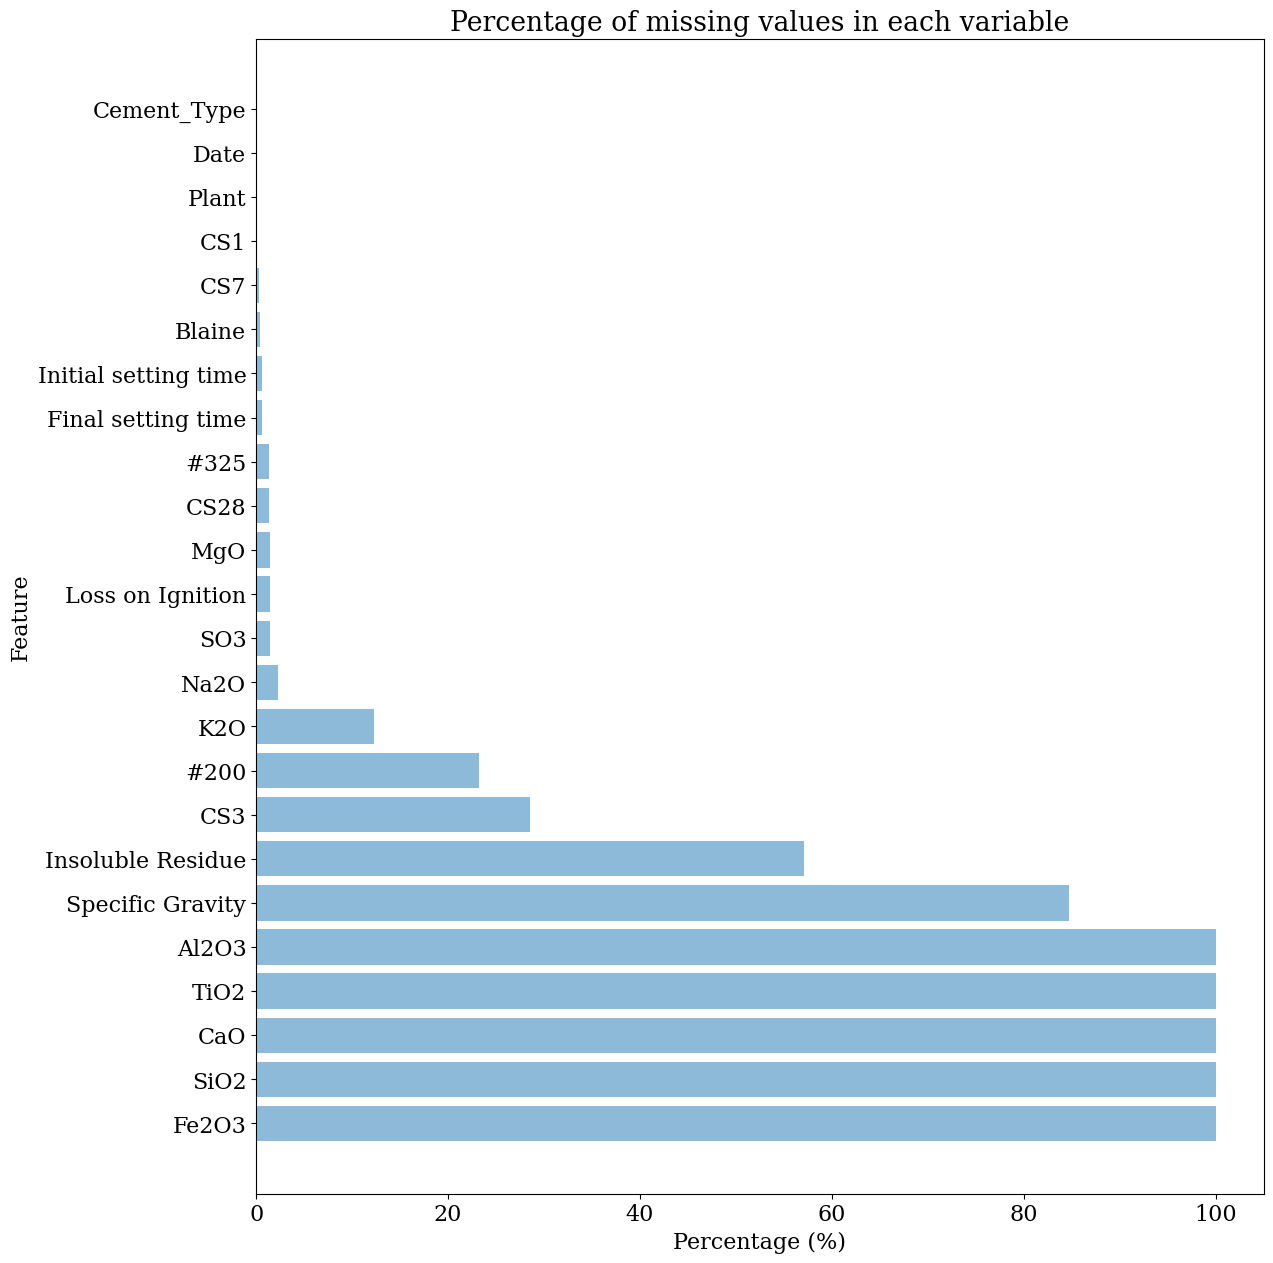

<IPython.core.display.Javascript object>

In [39]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

### Missing values per cement type

In [40]:
missing_values = []
for cem_type, group in df.groupby("Cement_Type"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(
        name=f"Missing (%) for {cem_type}"
    )
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [41]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 5 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

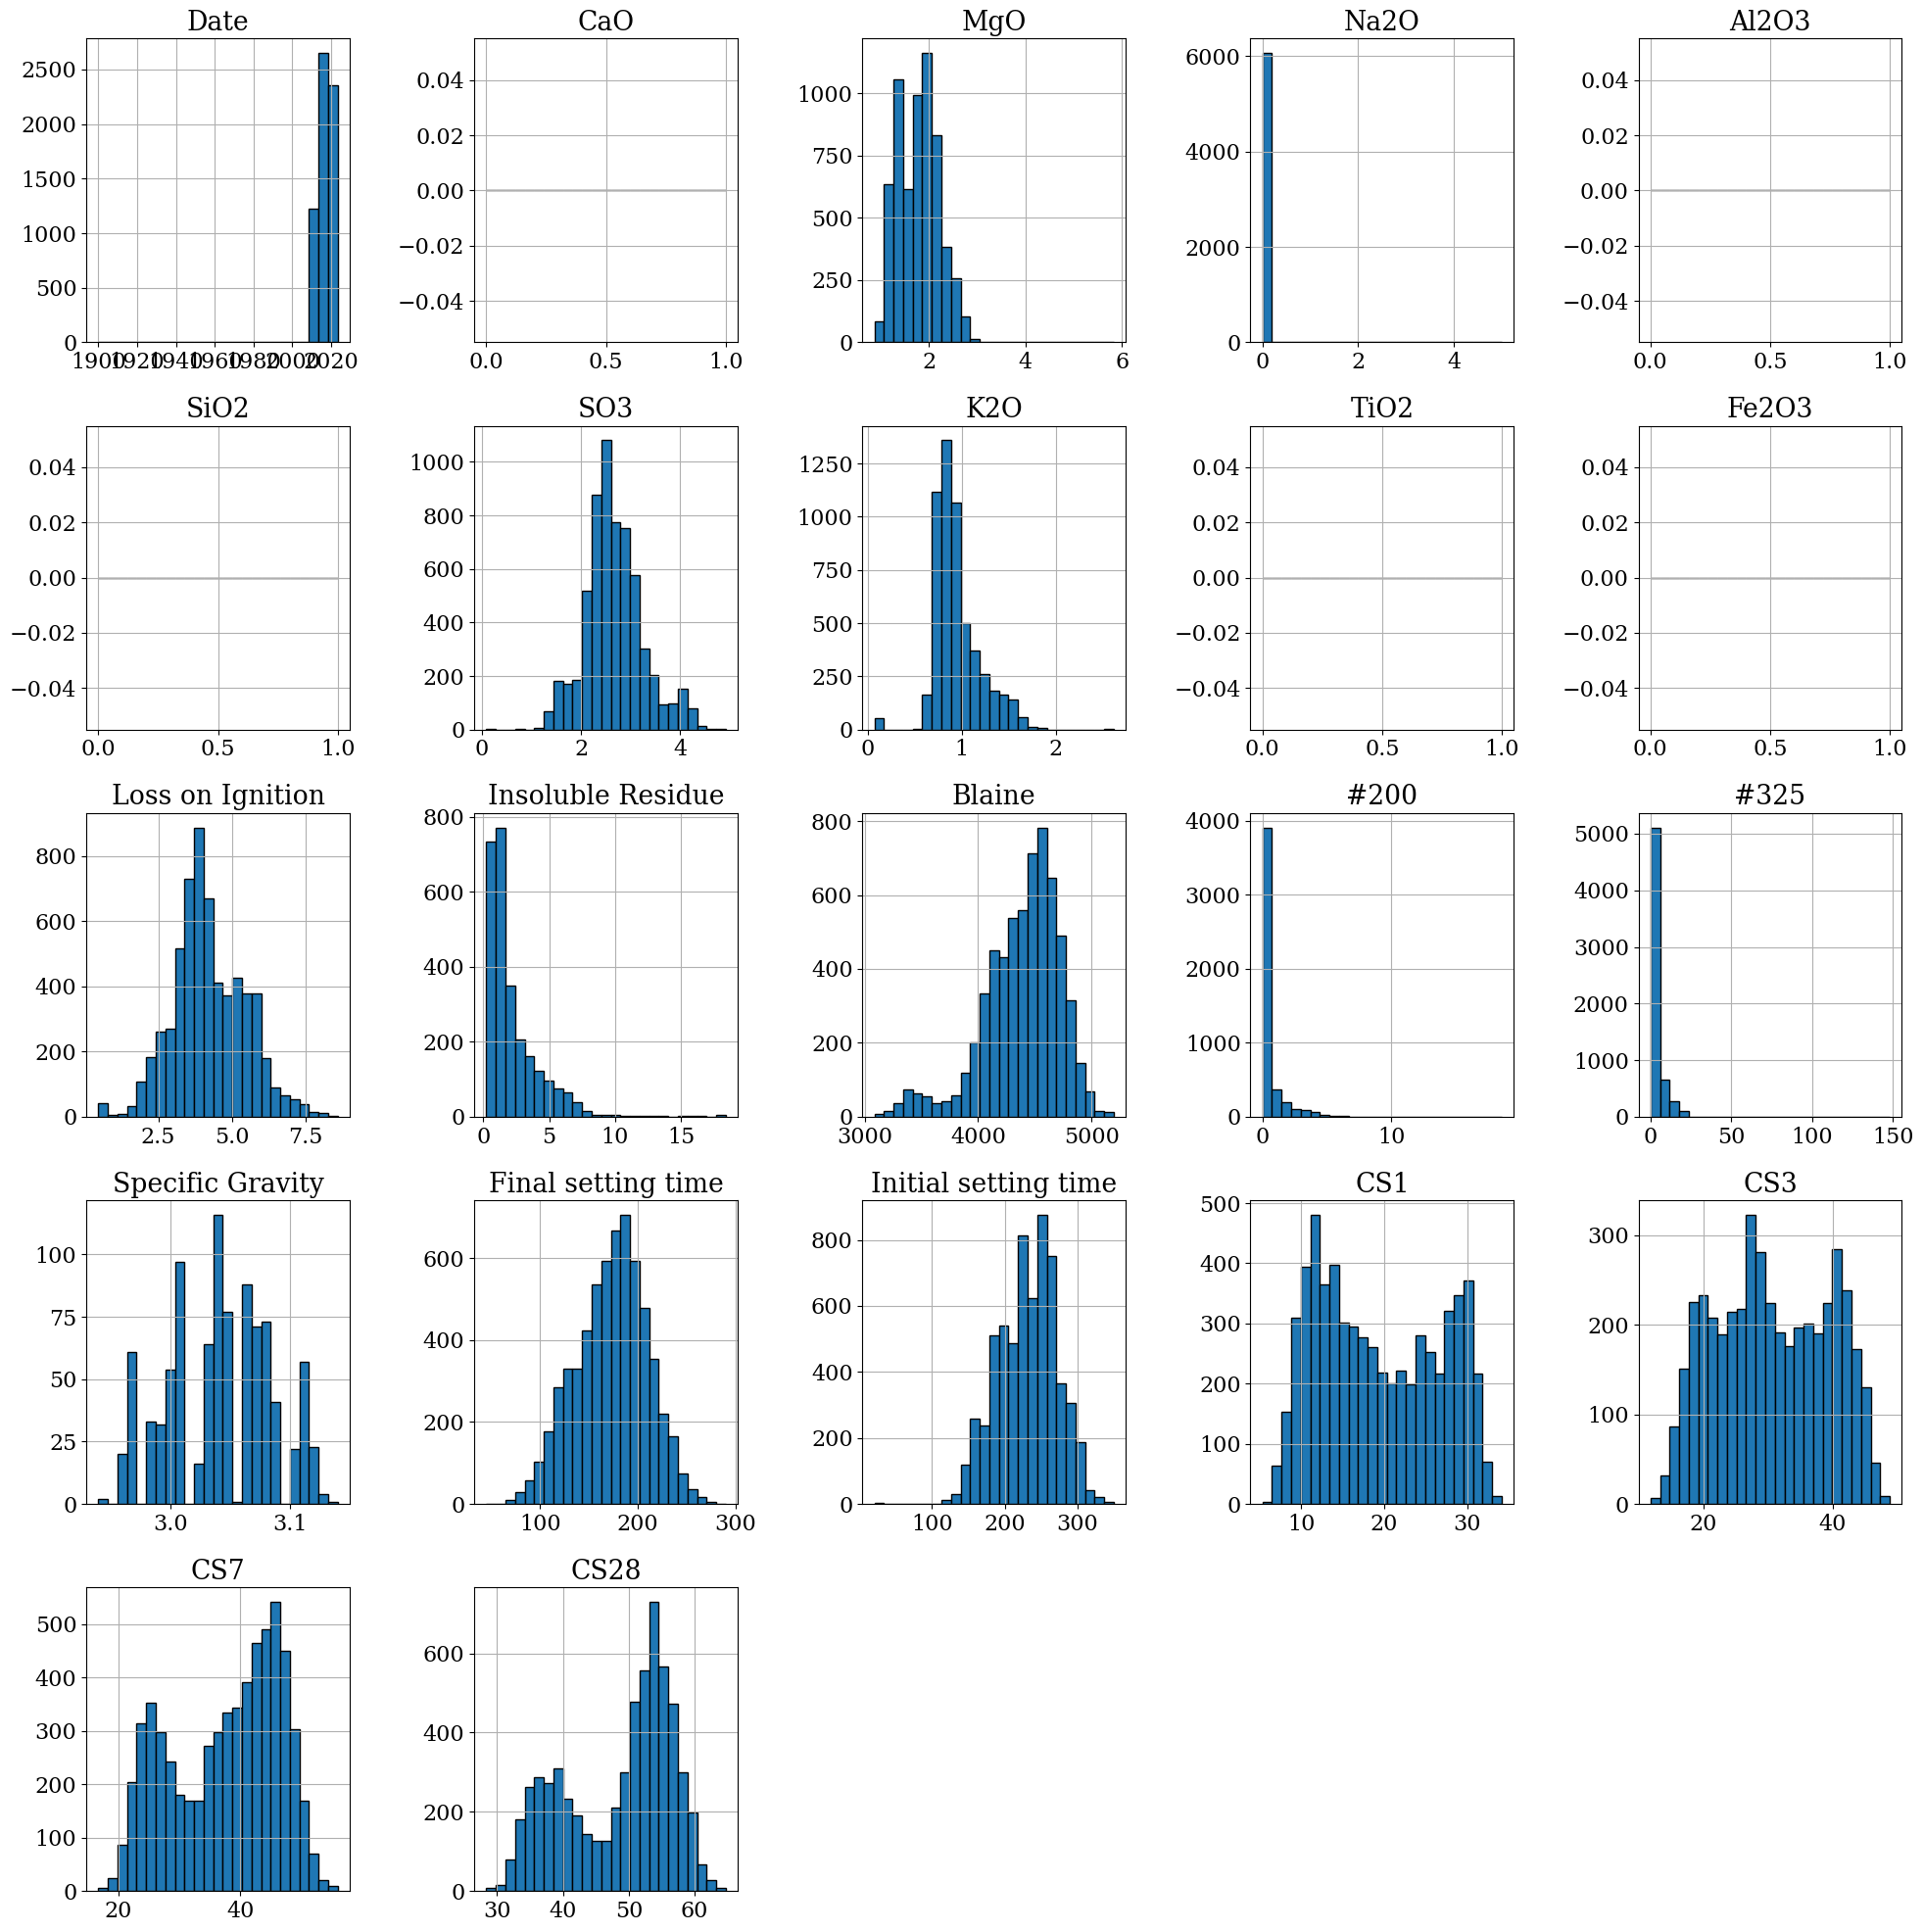

<IPython.core.display.Javascript object>

In [42]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

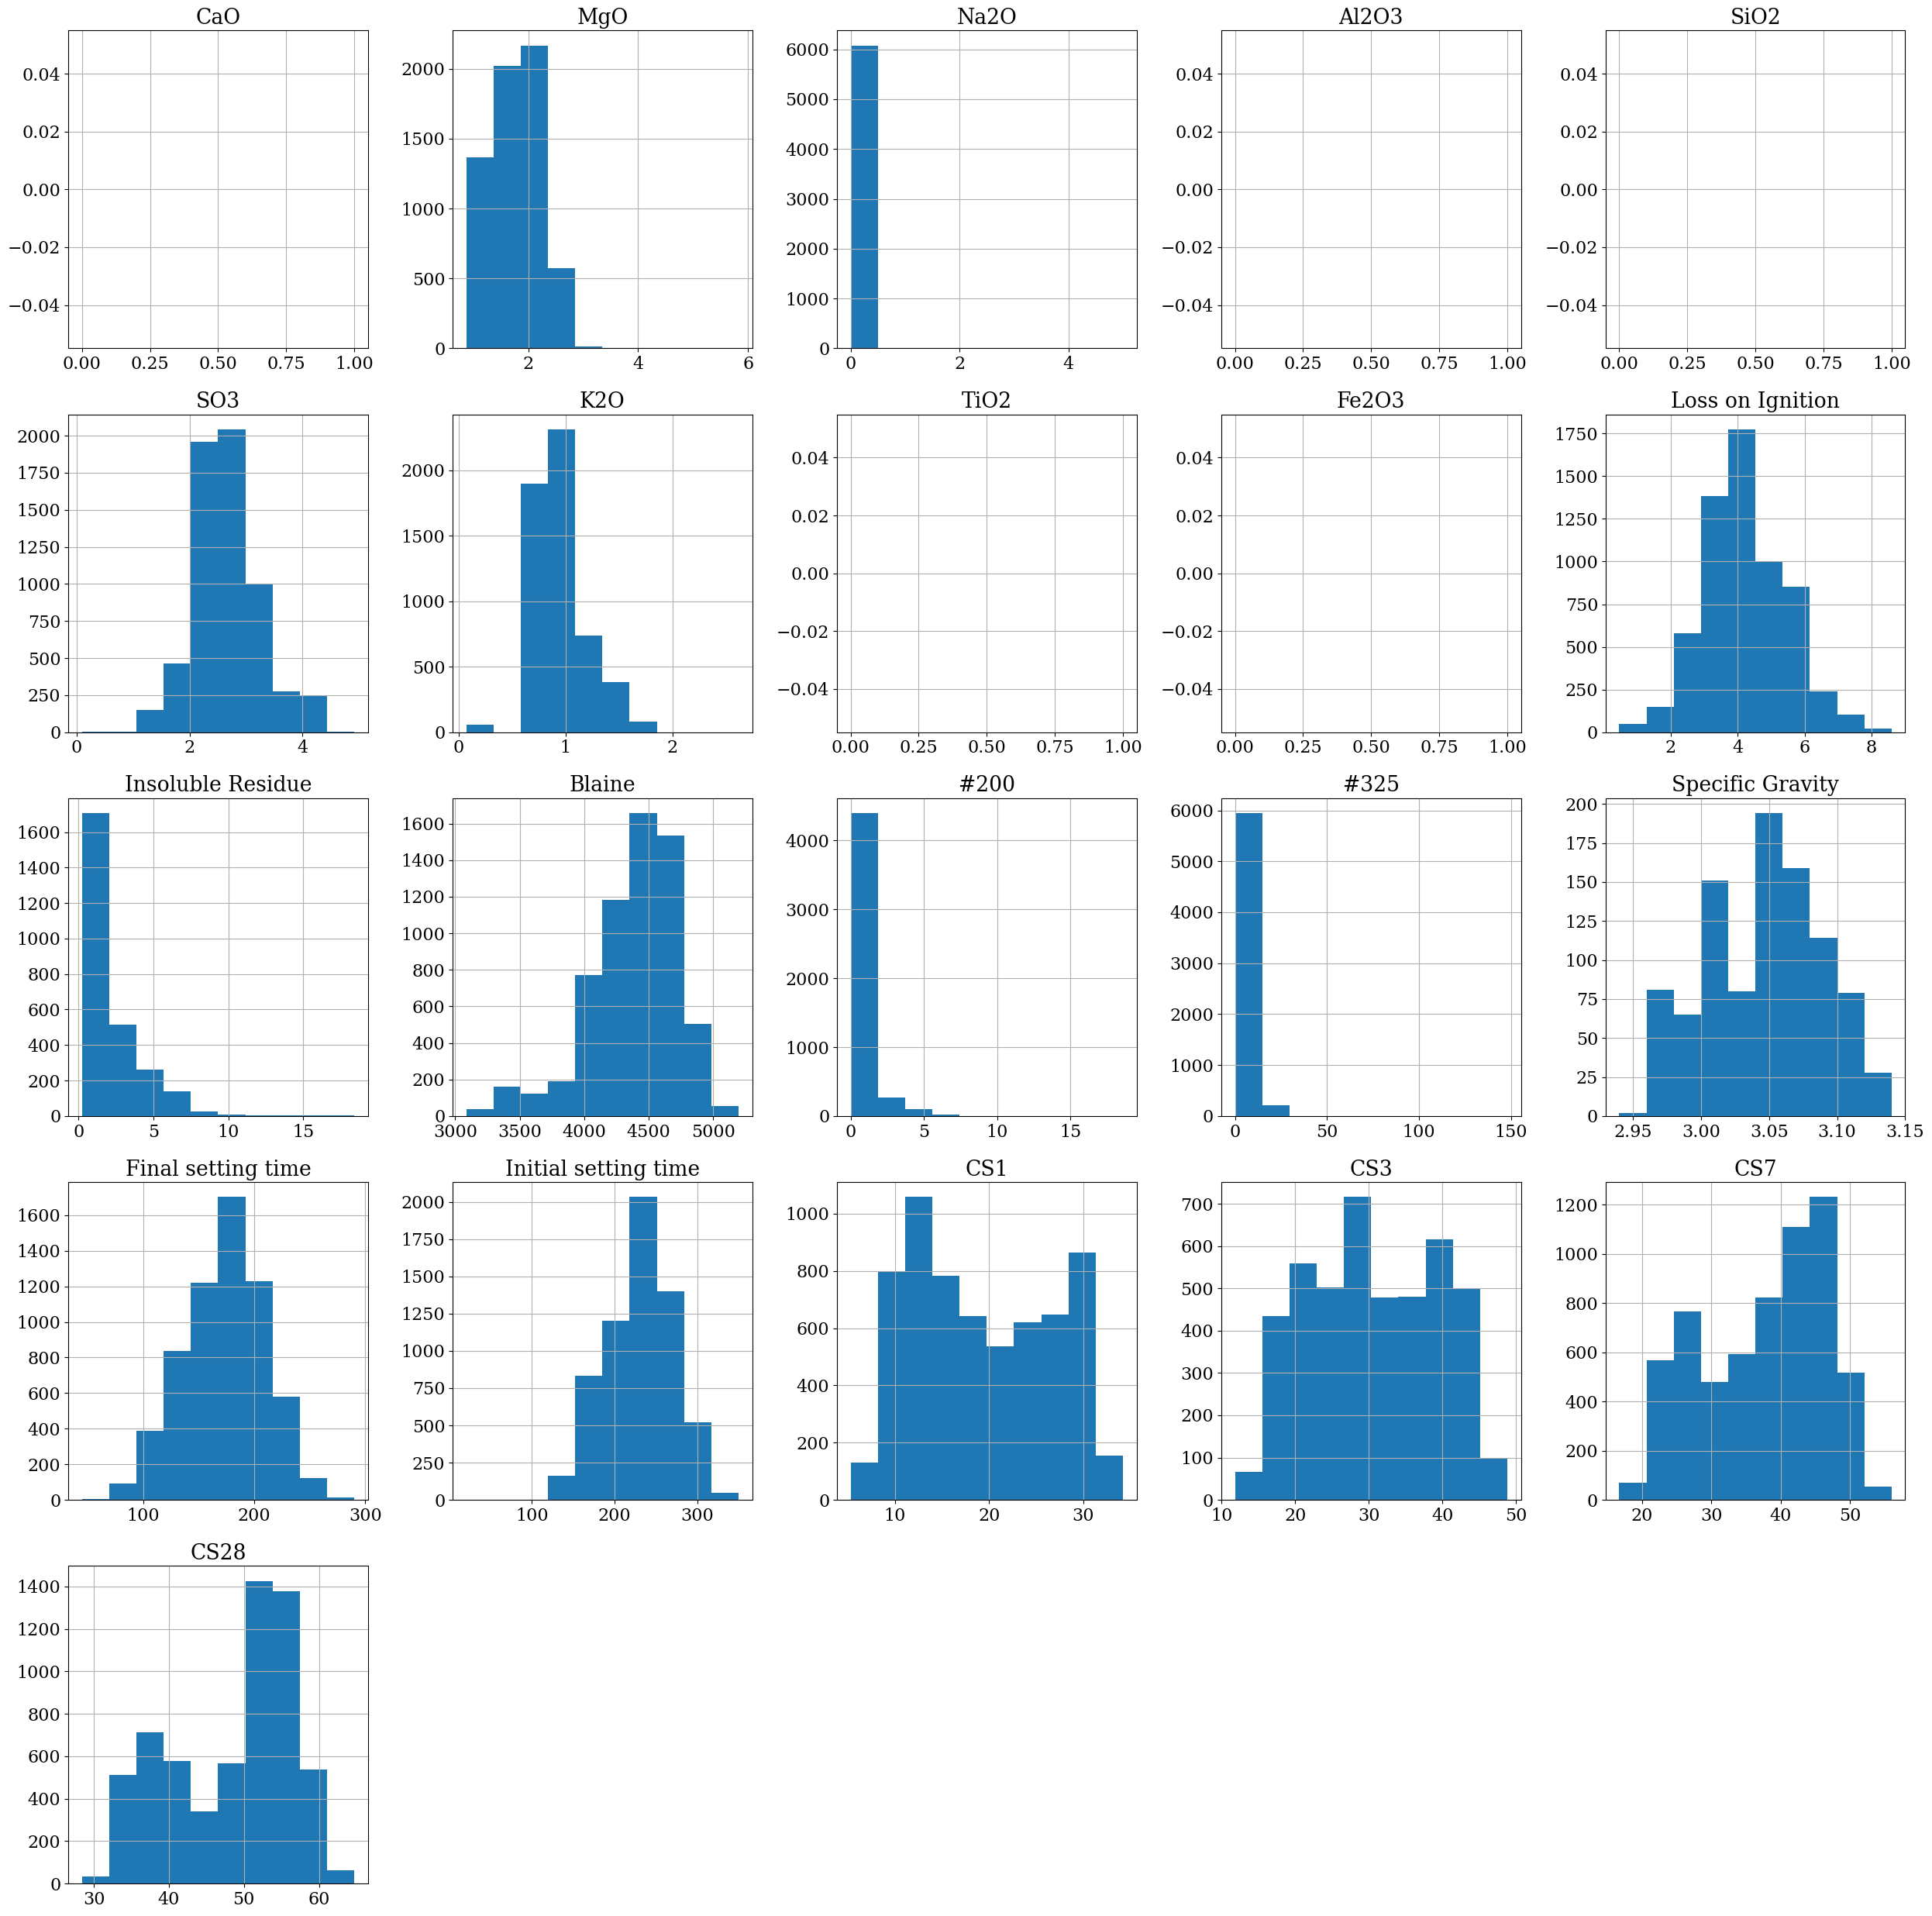

<IPython.core.display.Javascript object>

In [43]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

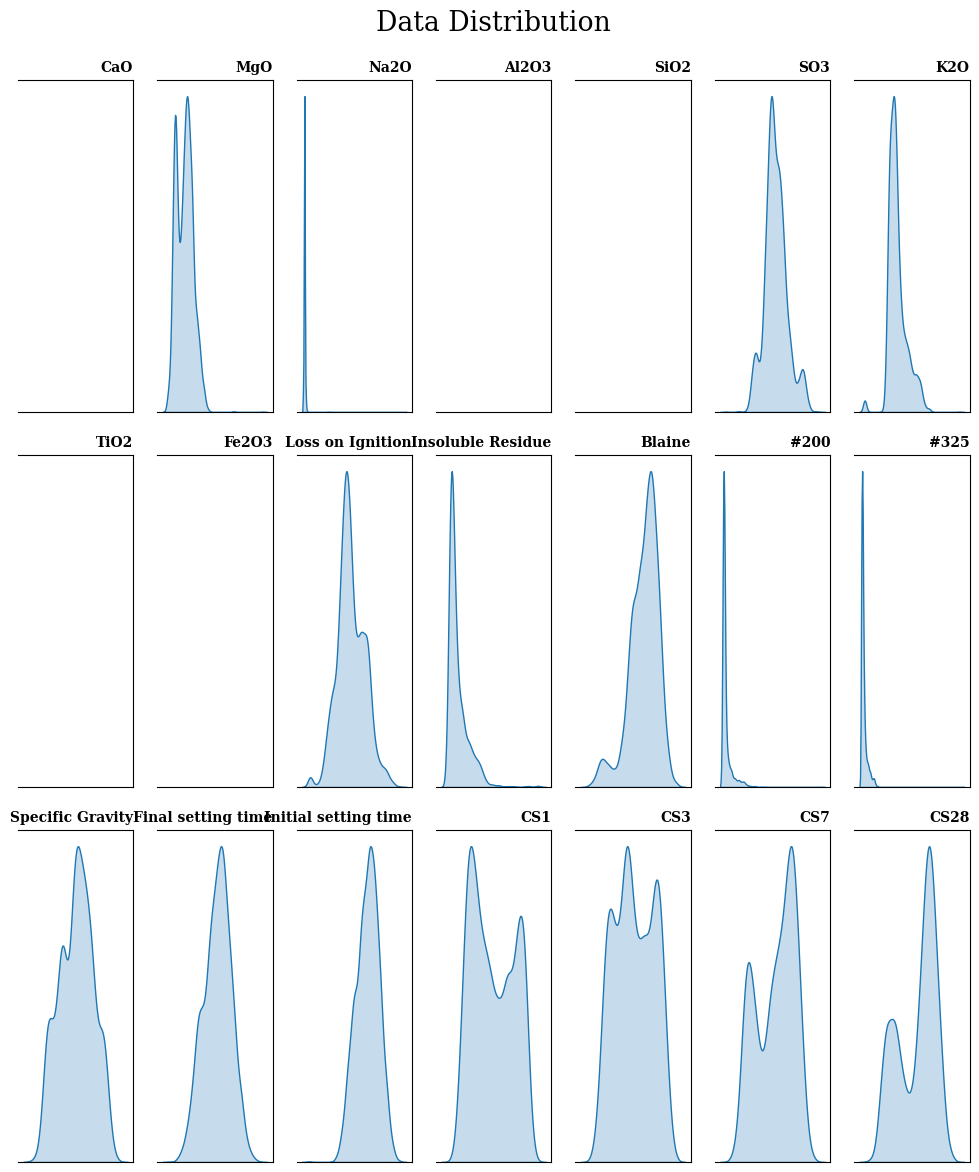

<IPython.core.display.Javascript object>

In [44]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

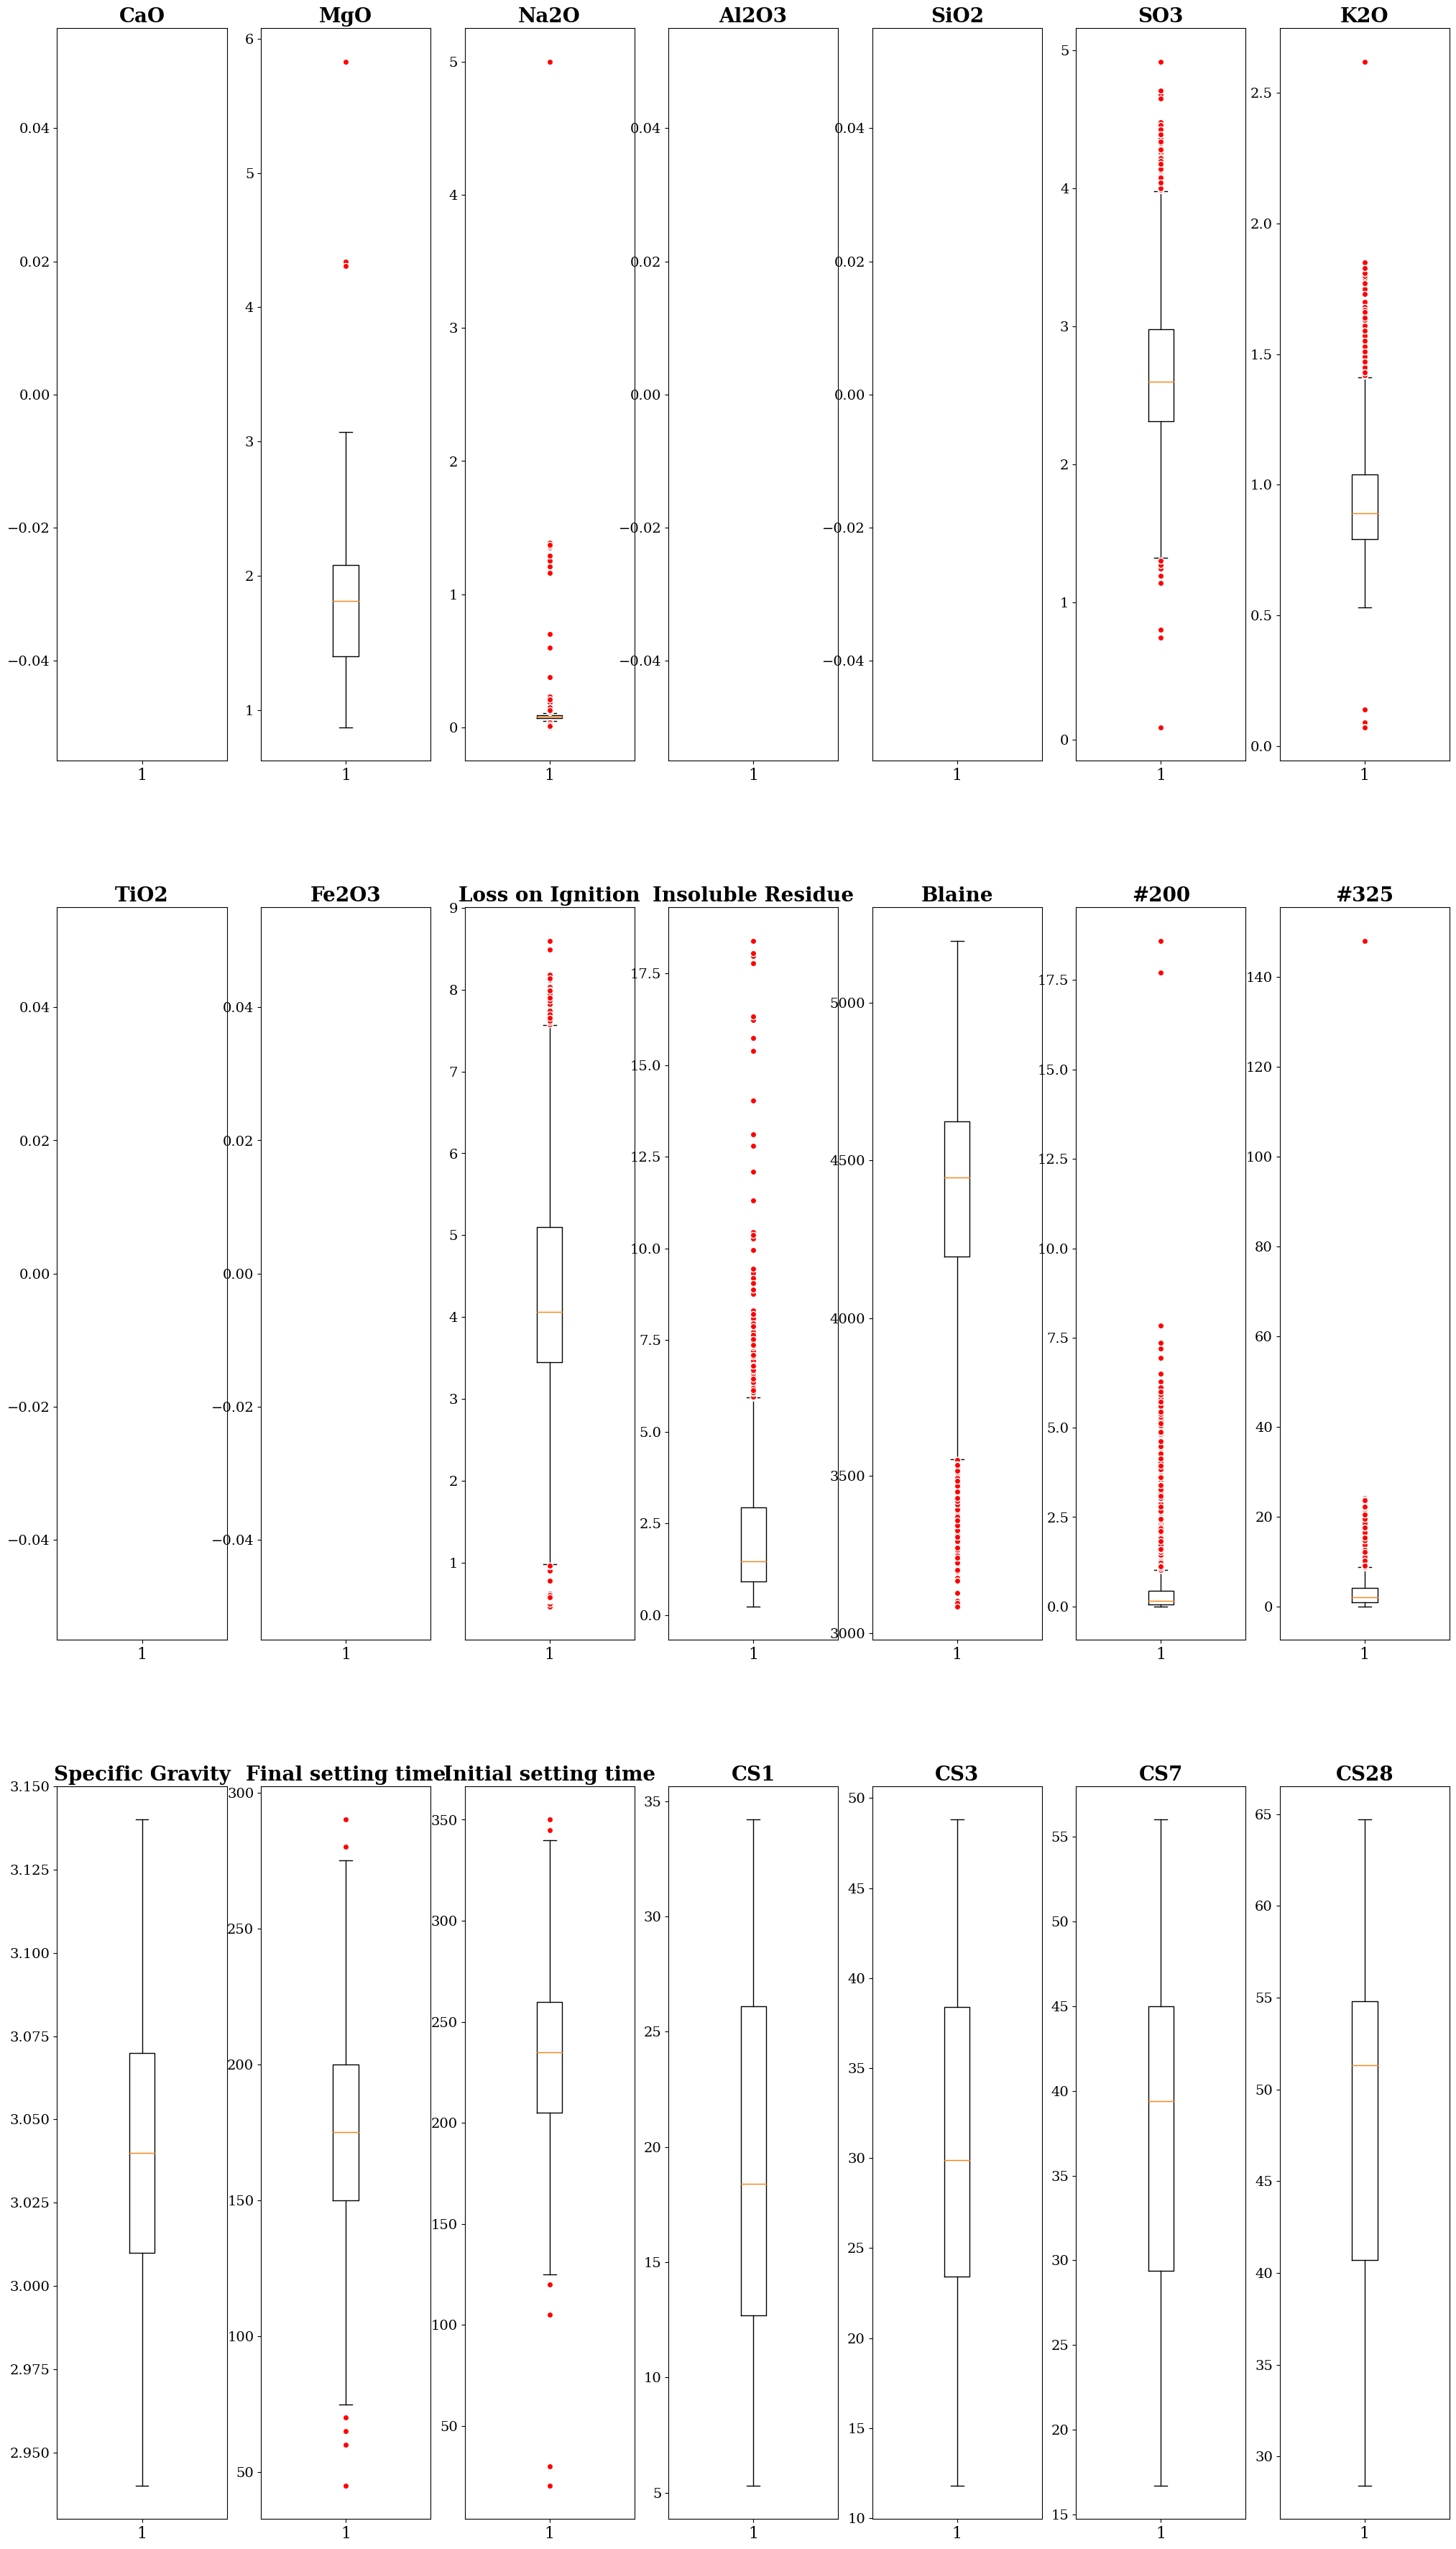

<IPython.core.display.Javascript object>

In [45]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

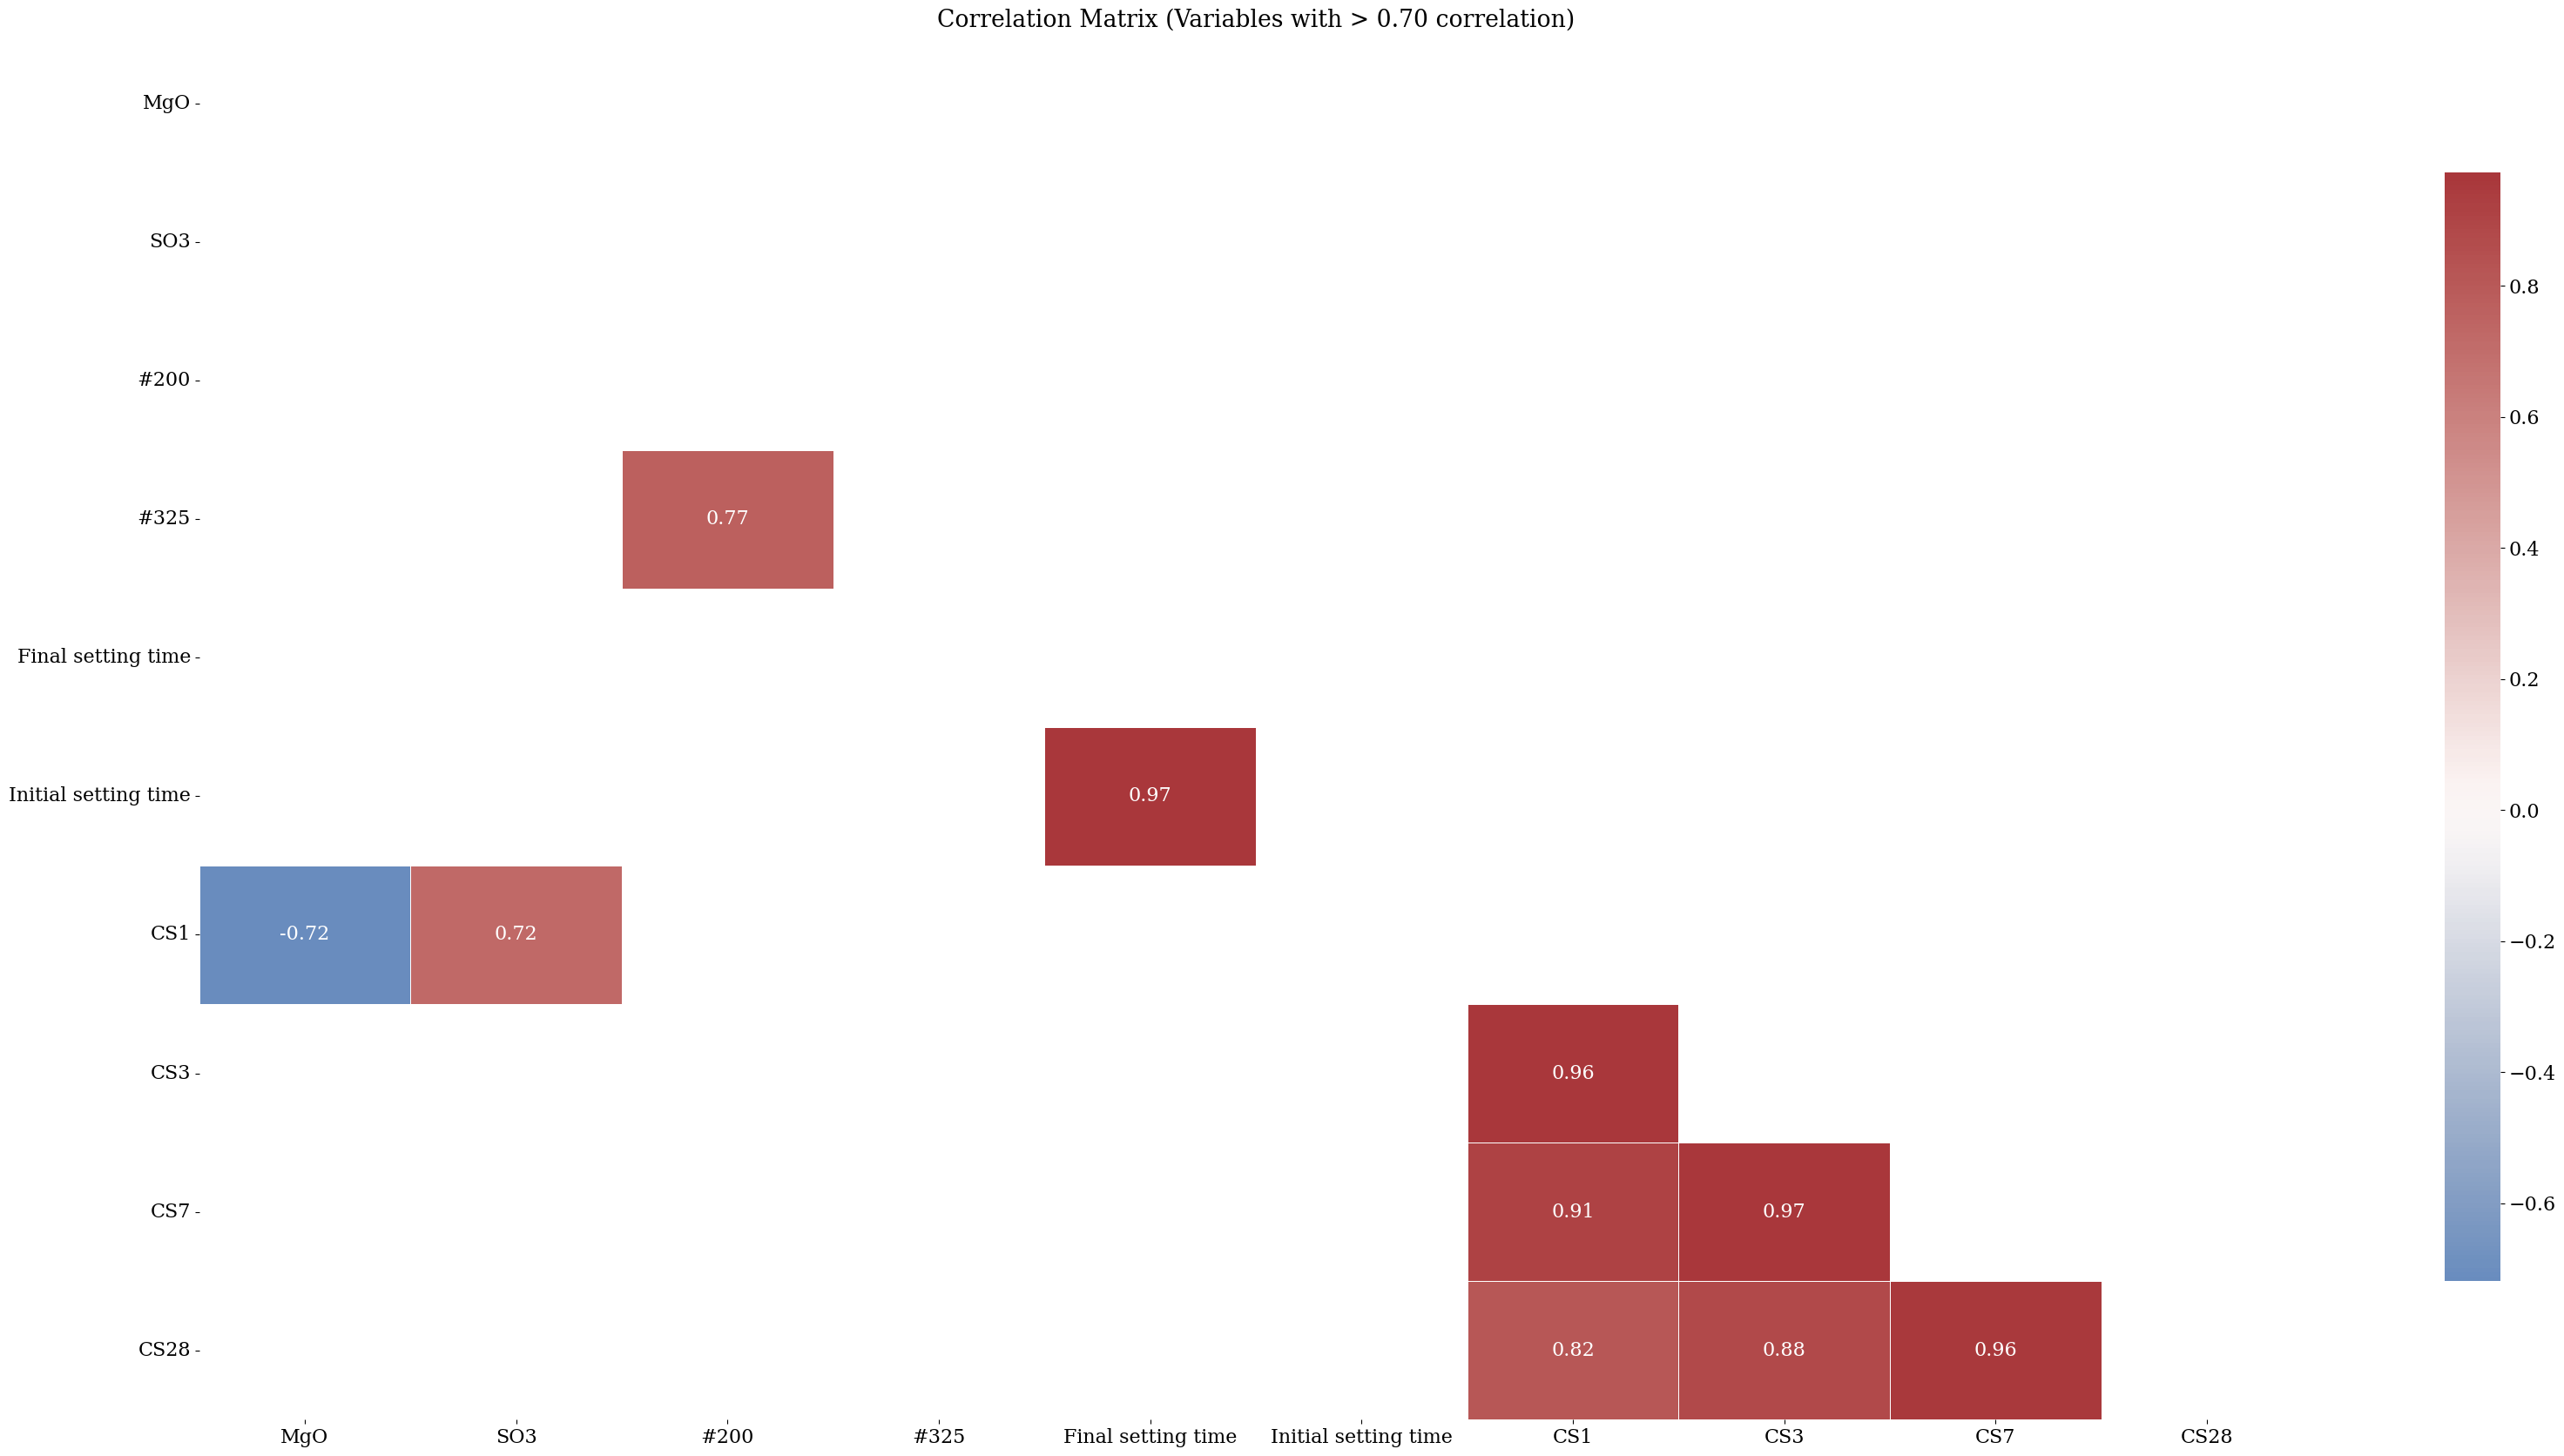

<IPython.core.display.Javascript object>

In [46]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [47]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.972692
CS3                 CS7                     0.970566
CS1                 CS3                     0.964342
CS7                 CS28                    0.955788
CS1                 CS7                     0.913099
CS3                 CS28                    0.882772
CS1                 CS28                    0.818185
#200                #325                    0.771249
SO3                 CS1                     0.724458
MgO                 CS1                     0.718790
dtype: float64

<IPython.core.display.Javascript object>

In [48]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.955788
CS3                   CS28    0.882772
CS1                   CS28    0.818185
K2O                   CS28    0.654429
Insoluble Residue     CS28    0.640615
Loss on Ignition      CS28    0.617044
Final setting time    CS28    0.546459
Initial setting time  CS28    0.535319
#325                  CS28    0.523923
SO3                   CS28    0.504746
#200                  CS28    0.446417
Specific Gravity      CS28    0.404707
MgO                   CS28    0.382363
Blaine                CS28    0.301336
Na2O                  CS28    0.050707
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

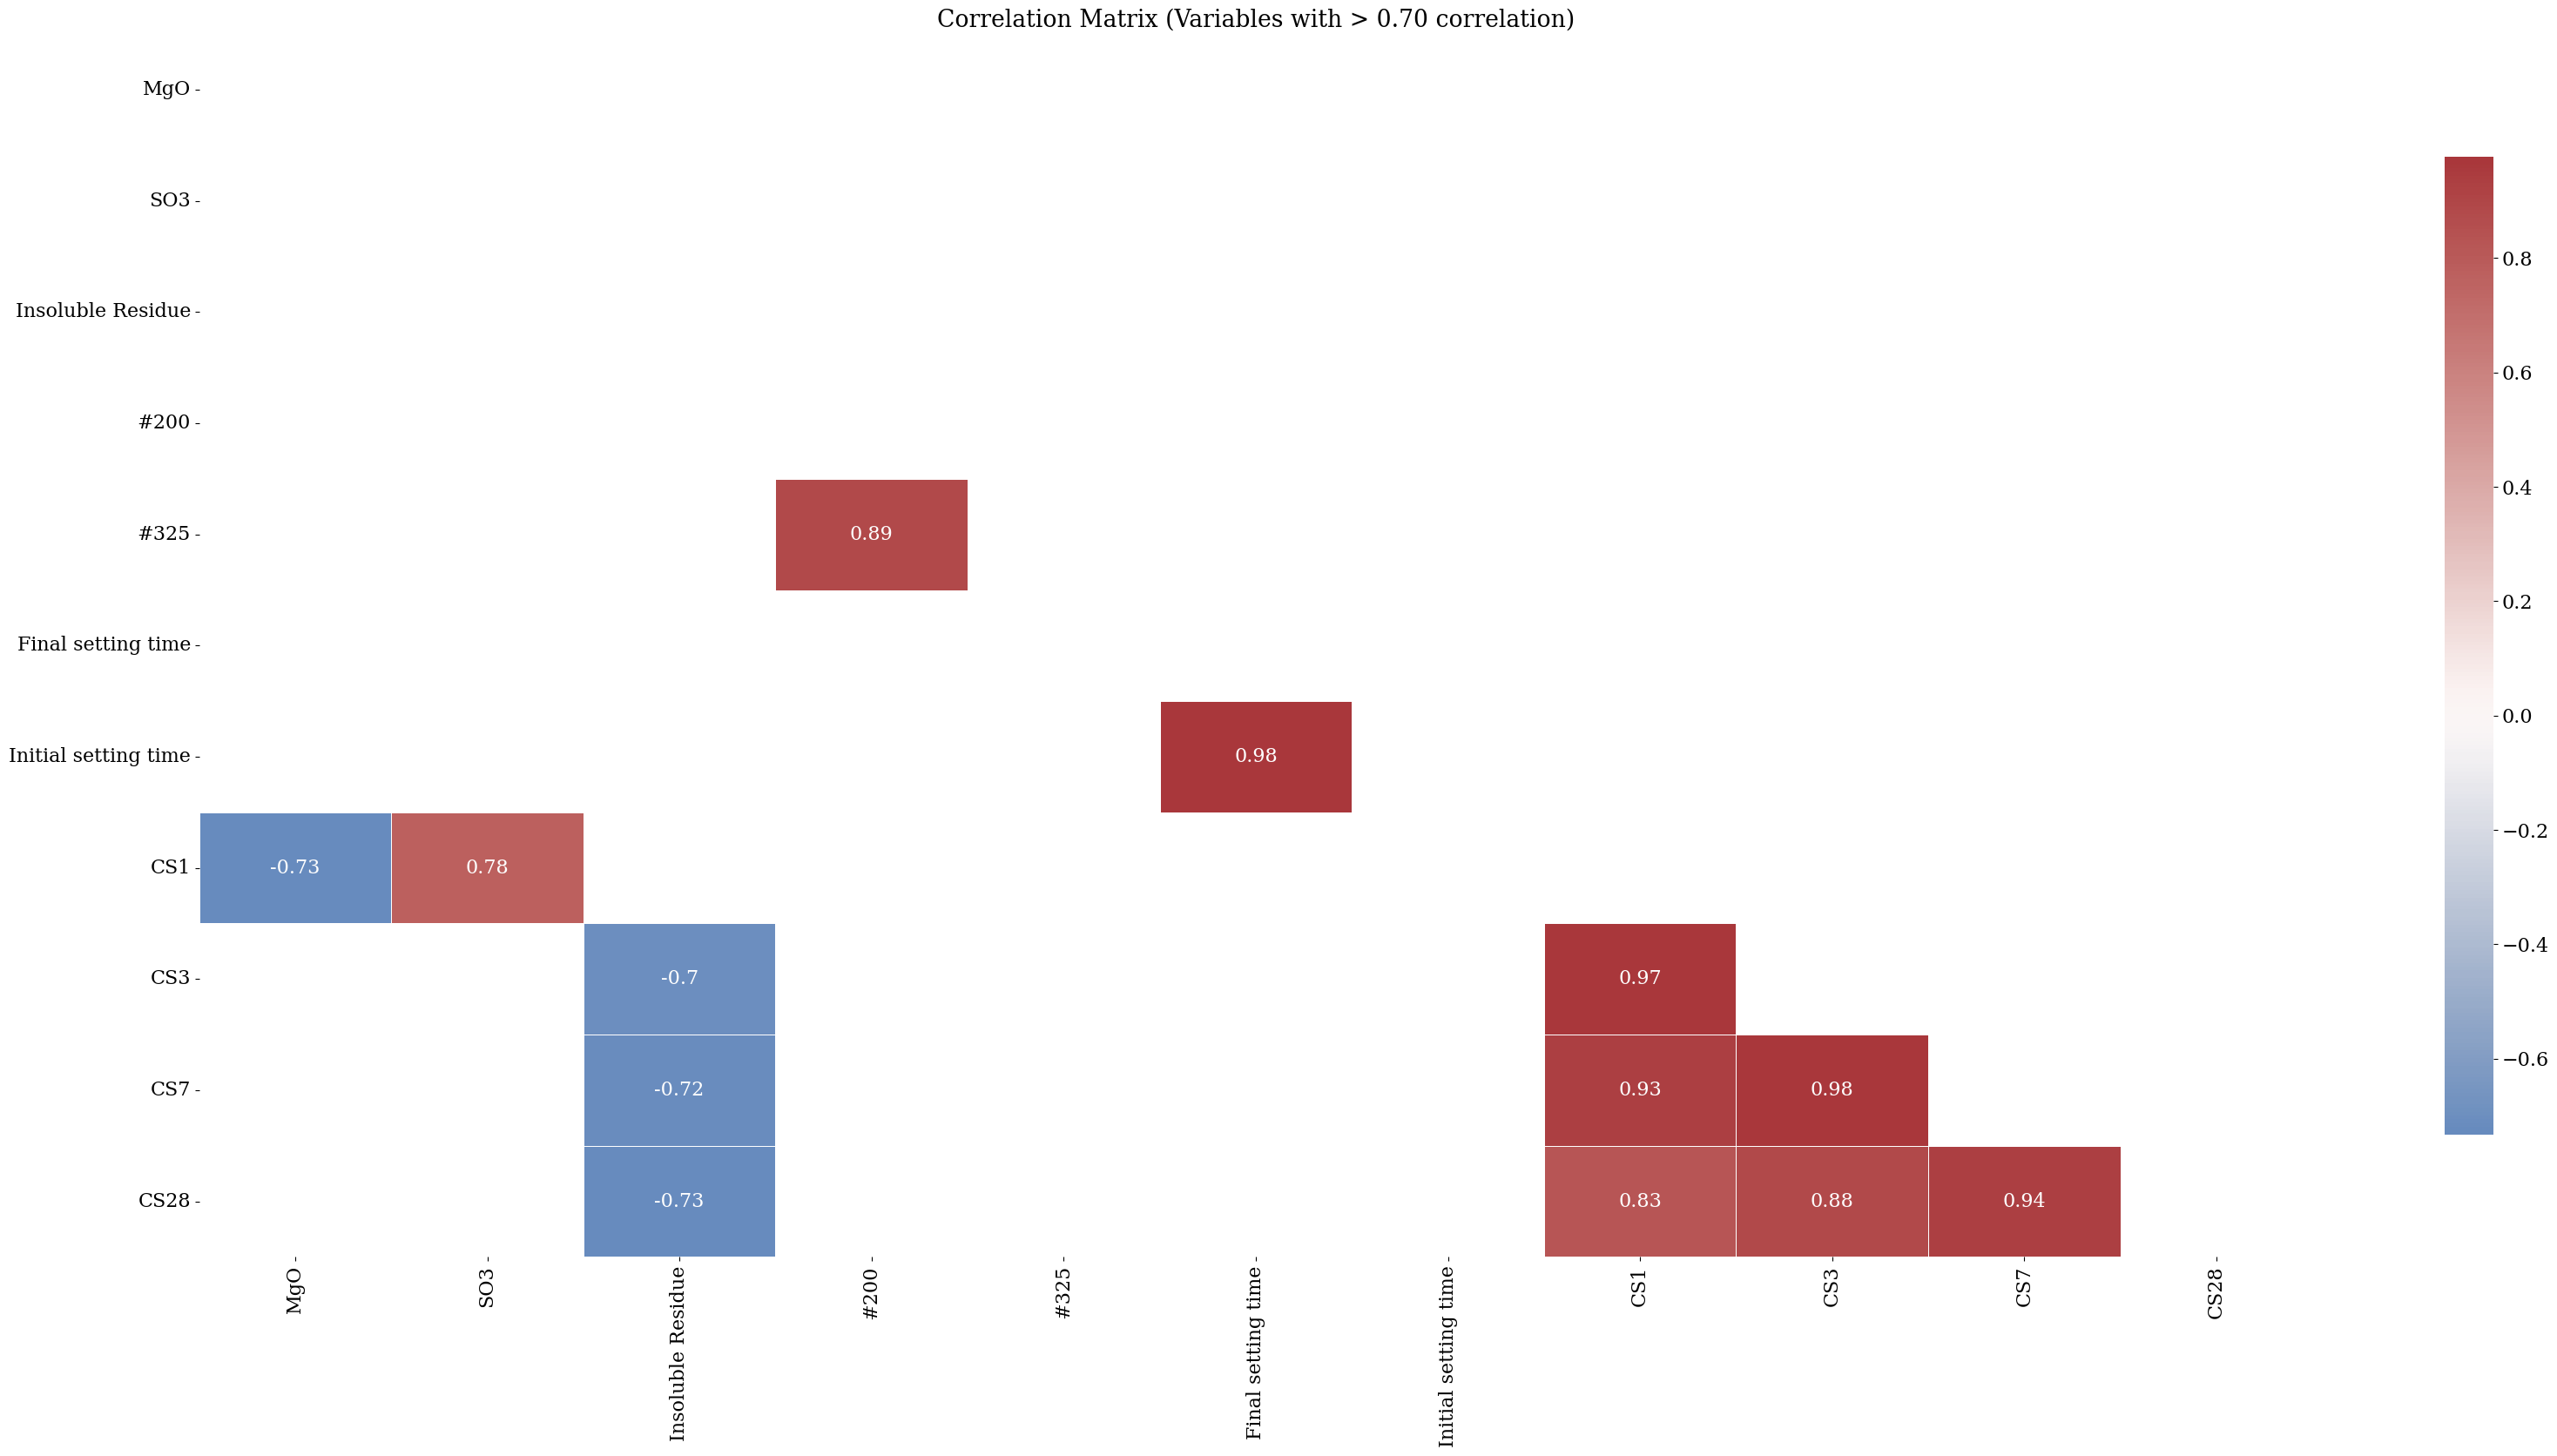

<IPython.core.display.Javascript object>

In [49]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [50]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.977536
CS3                 CS7                     0.976123
CS1                 CS3                     0.968518
CS7                 CS28                    0.936163
CS1                 CS7                     0.932522
#200                #325                    0.886738
CS3                 CS28                    0.884563
CS1                 CS28                    0.826534
SO3                 CS1                     0.775041
Insoluble Residue   CS28                    0.732813
MgO                 CS1                     0.725280
Insoluble Residue   CS7                     0.718185
                    CS3                     0.702174
dtype: float64

<IPython.core.display.Javascript object>

In [51]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.936163
CS3                   CS28    0.884563
CS1                   CS28    0.826534
Insoluble Residue     CS28    0.732813
#325                  CS28    0.653724
Loss on Ignition      CS28    0.597711
K2O                   CS28    0.595060
SO3                   CS28    0.587097
Final setting time    CS28    0.544553
Initial setting time  CS28    0.535926
#200                  CS28    0.530409
MgO                   CS28    0.461702
Specific Gravity      CS28    0.410648
Blaine                CS28    0.323516
Na2O                  CS28    0.035951
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

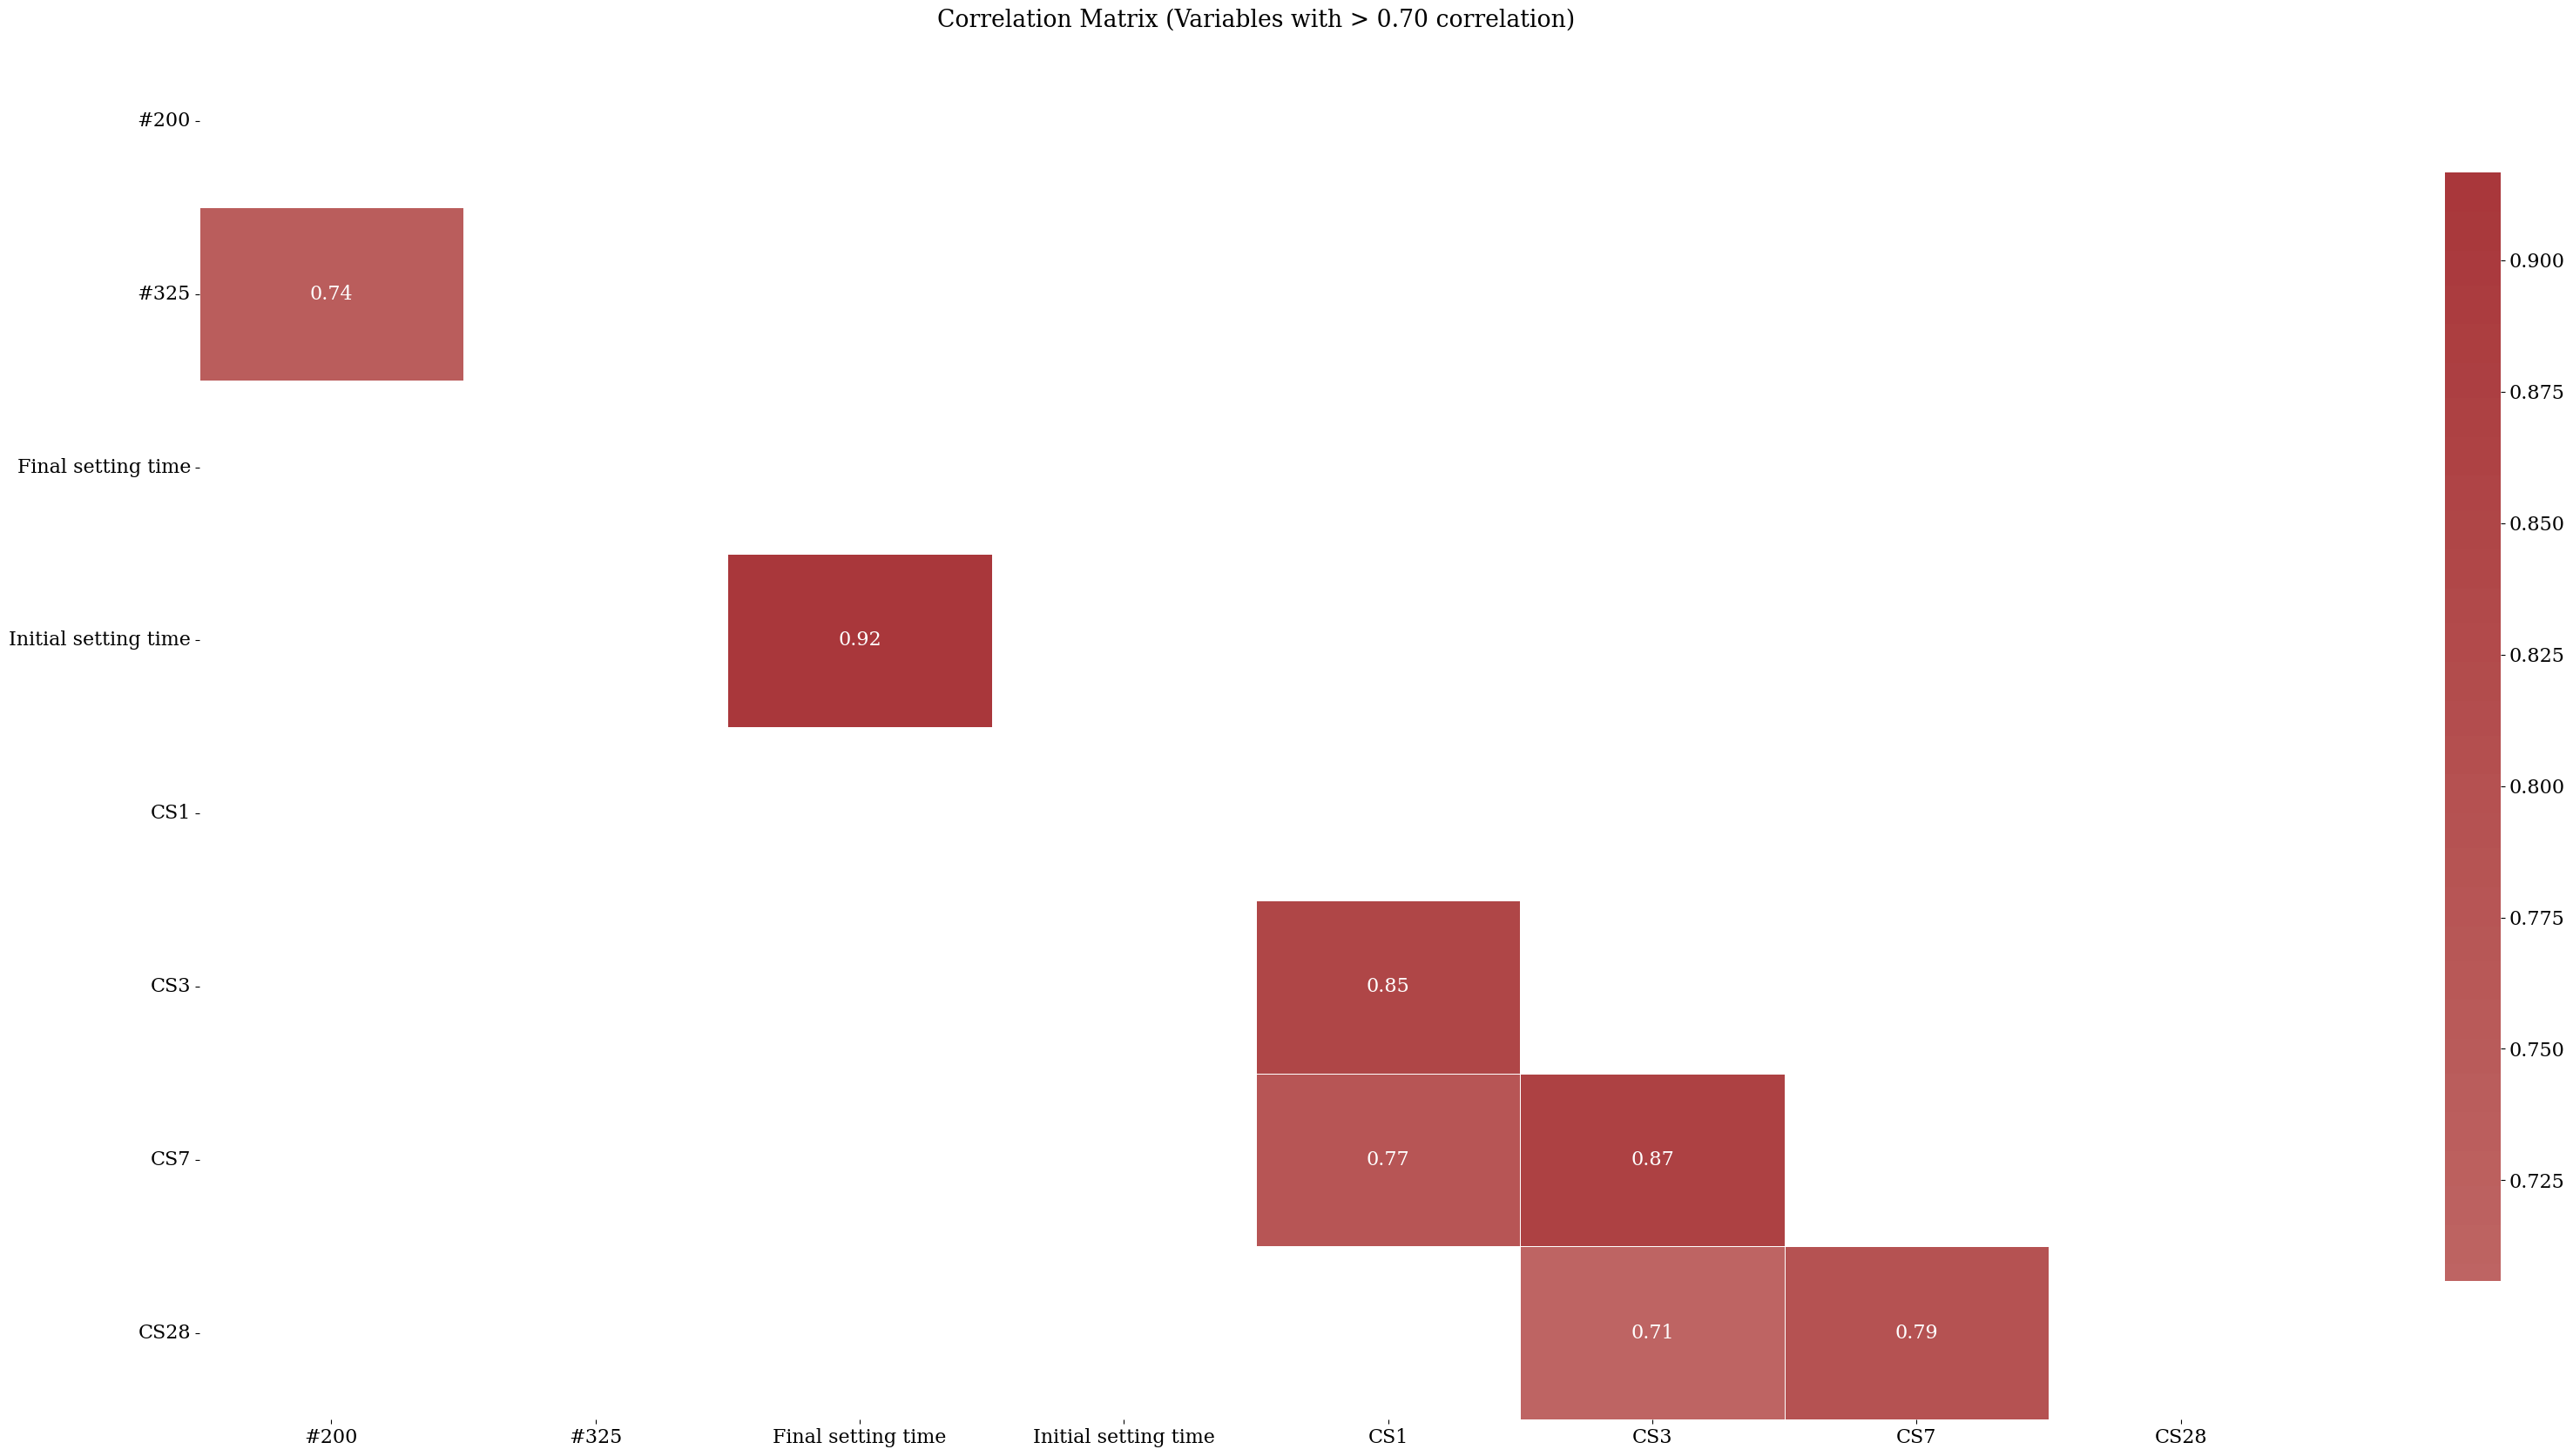

<IPython.core.display.Javascript object>

In [52]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall")

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]

df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)

if len(df_corr) > 0:
    labels = np.where(
        np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
    )

    plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
    # plt.show()

    sns.heatmap(
        df_corr,
        mask=np.triu(np.ones_like(df_corr, dtype=bool)),
        square=False,
        center=0,
        annot=labels,
        fmt="",
        linewidths=0.5,
        cmap="vlag",
        cbar_kws={"shrink": 0.8},
        ax=ax,
    )

    plt.tight_layout()

In [53]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.916598
CS3                 CS7                     0.868997
CS1                 CS3                     0.846417
CS7                 CS28                    0.788837
CS1                 CS7                     0.774823
#200                #325                    0.744563
CS3                 CS28                    0.705833
dtype: float64

<IPython.core.display.Javascript object>

In [54]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.788837
CS3                   CS28    0.705833
CS1                   CS28    0.636436
Insoluble Residue     CS28    0.515739
#325                  CS28    0.443023
Loss on Ignition      CS28    0.412020
SO3                   CS28    0.404069
K2O                   CS28    0.400296
Final setting time    CS28    0.384159
Initial setting time  CS28    0.375954
#200                  CS28    0.360248
MgO                   CS28    0.304780
Specific Gravity      CS28    0.286841
Blaine                CS28    0.217823
Na2O                  CS28    0.037166
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

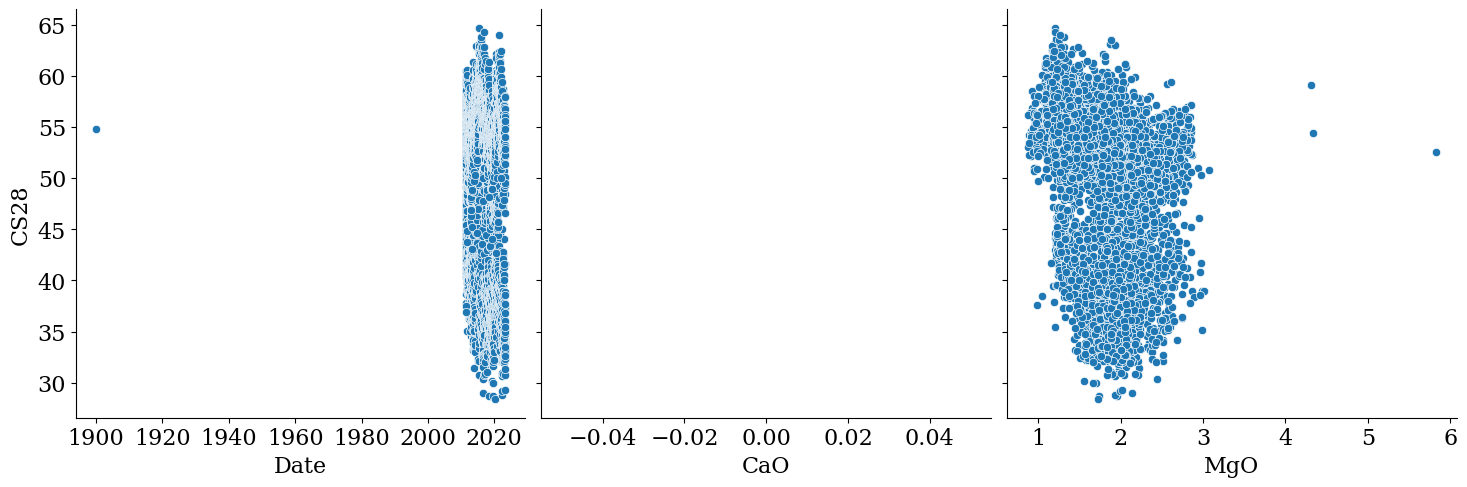

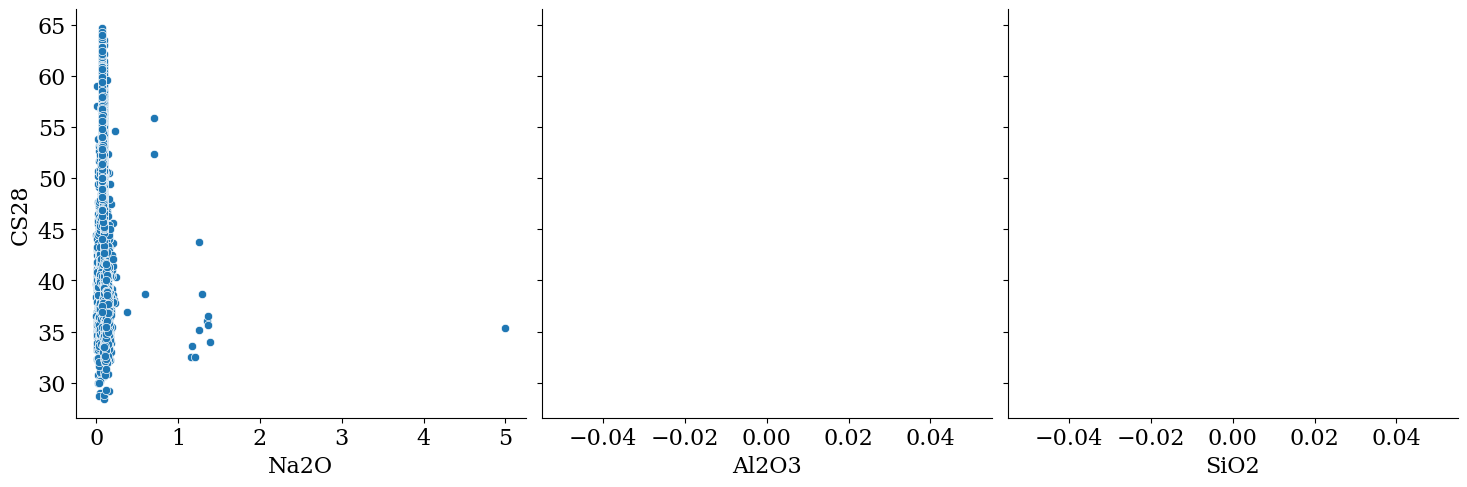

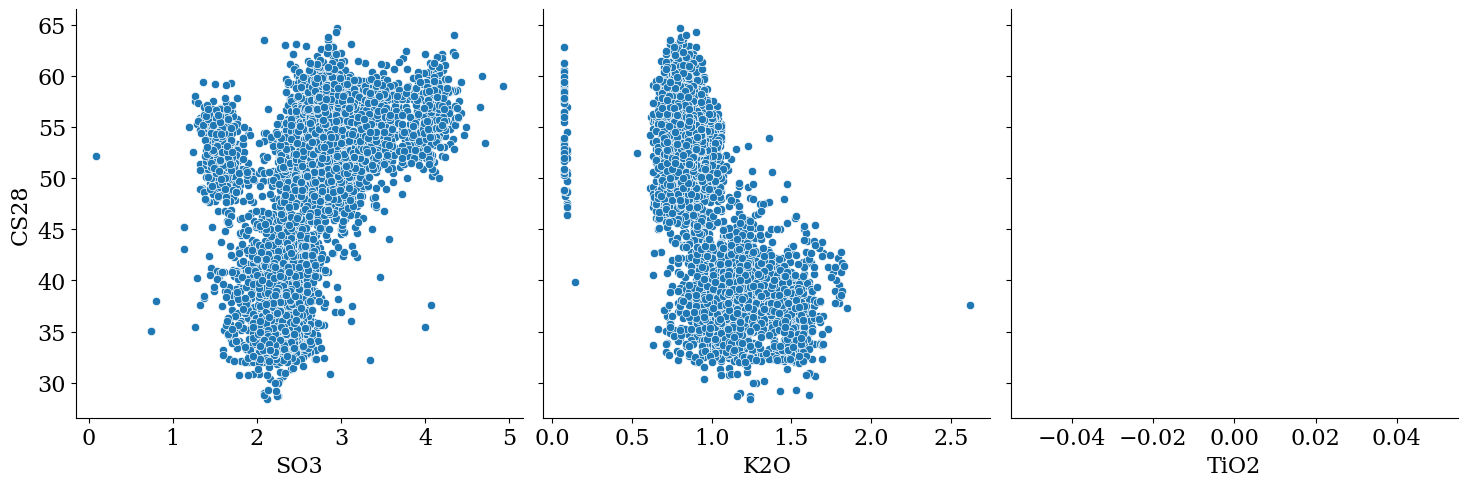

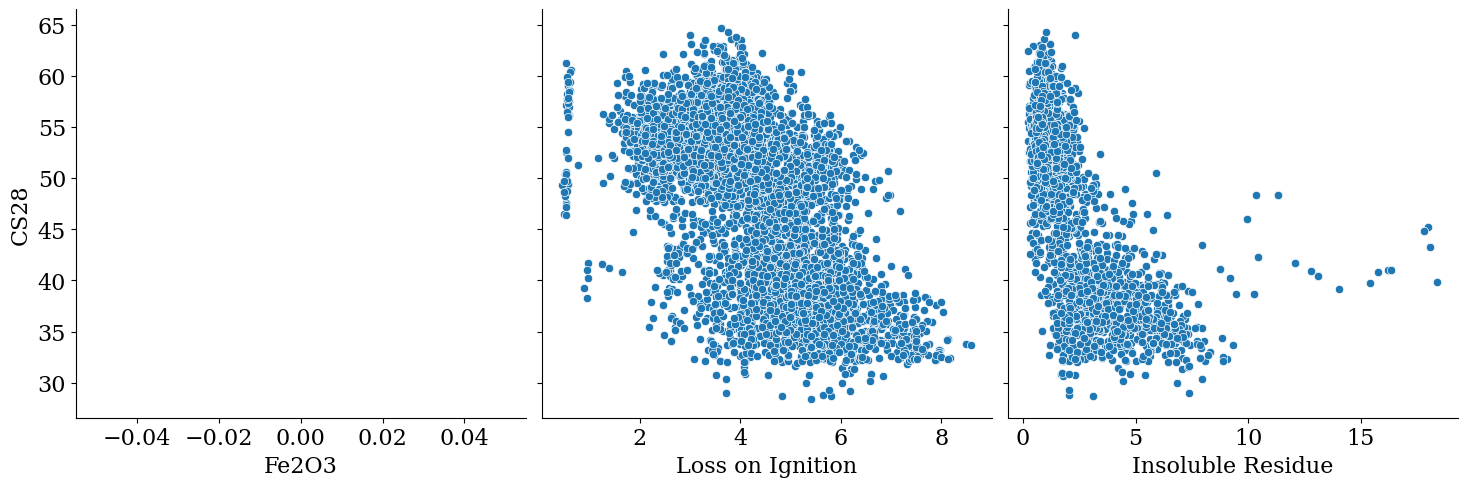

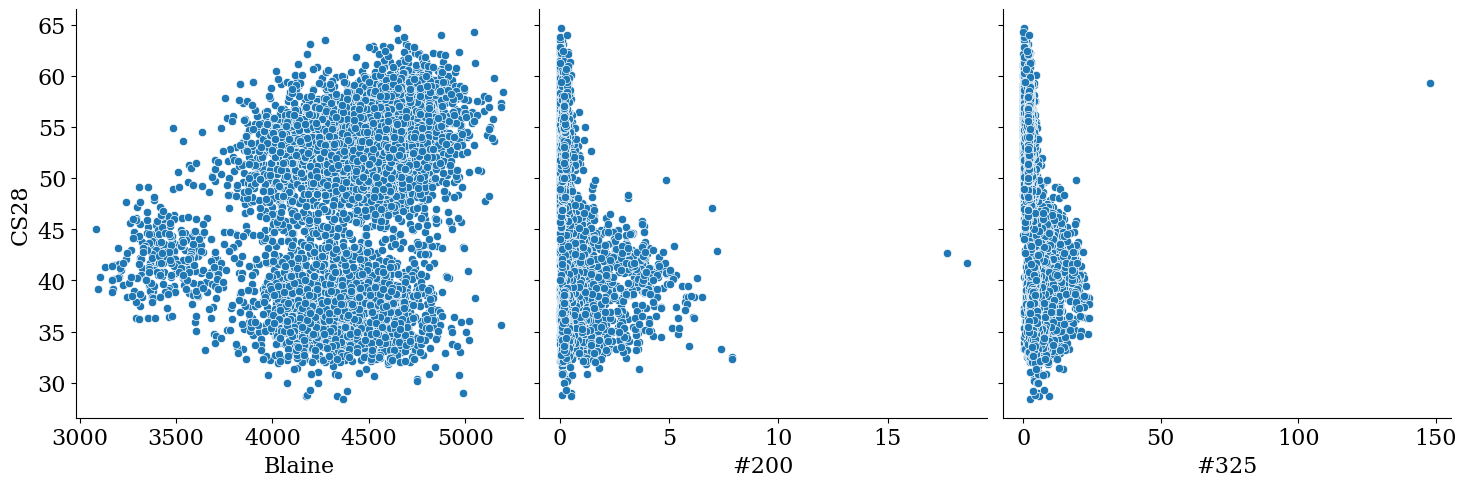

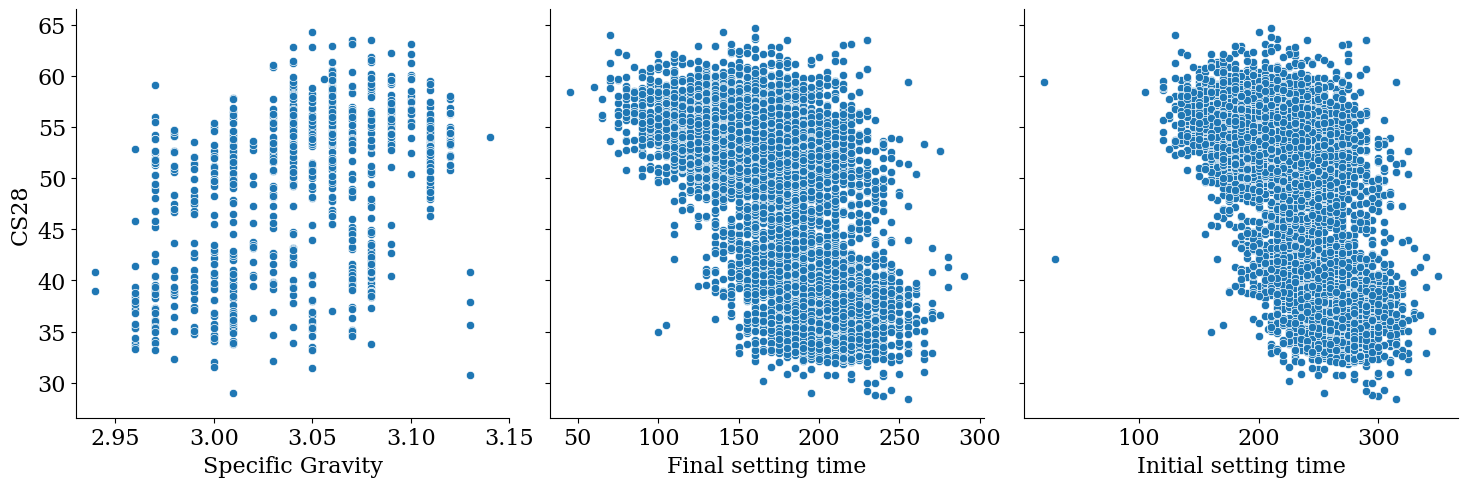

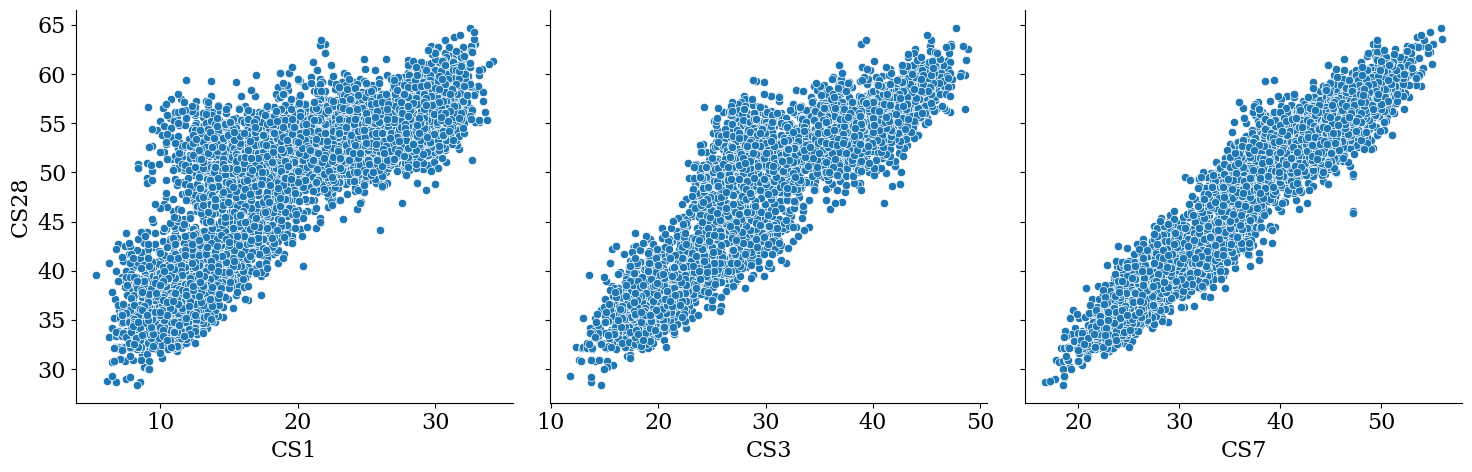

<IPython.core.display.Javascript object>

In [55]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [56]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

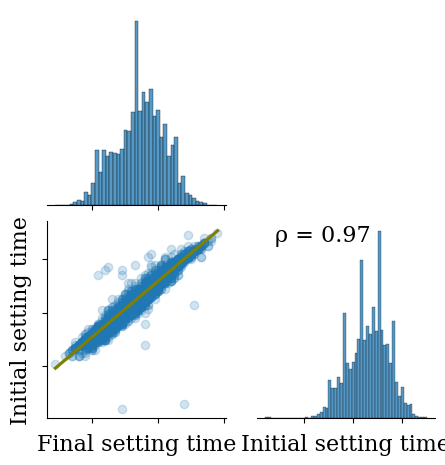

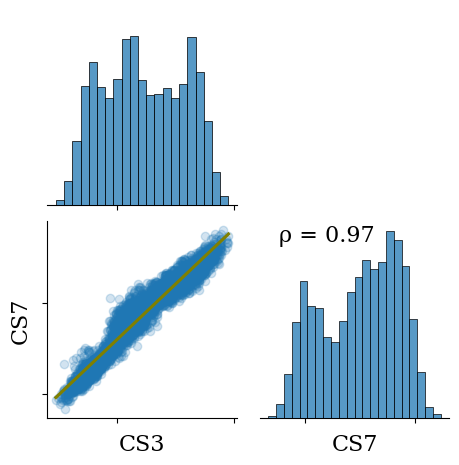

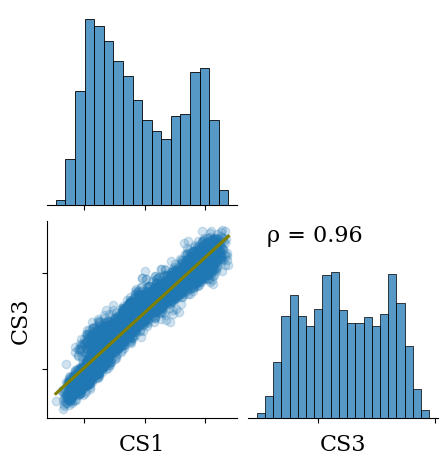

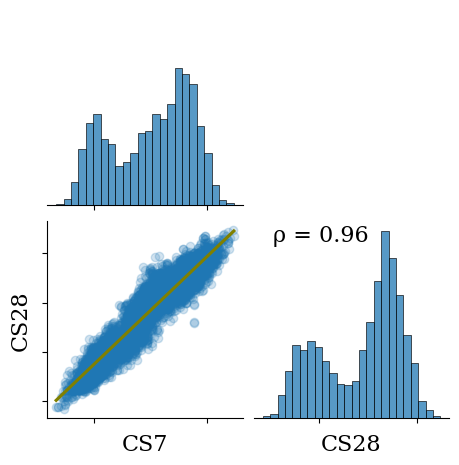

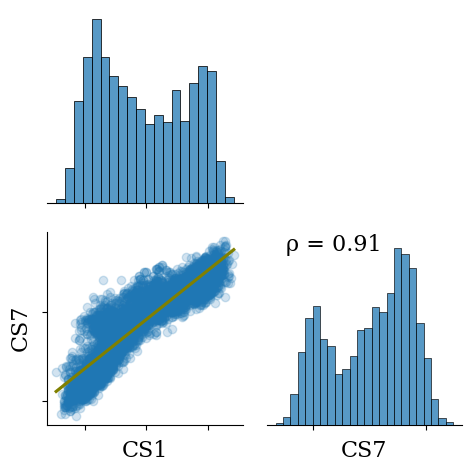

<IPython.core.display.Javascript object>

In [57]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [58]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

2448 valid days out of 2478


<IPython.core.display.Javascript object>

In [59]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 1900, 2011, 2012, 2013, 2014, 2015}


<IPython.core.display.Javascript object>

In [60]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2016: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2017: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2018: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2019: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4},
 1900: {1},
 2011: {5, 6, 7, 8, 9, 10, 11, 12},
 2012: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2013: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2014: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2015: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

<IPython.core.display.Javascript object>

In [61]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
1900  1         1
2011  5        17
      6        16
      7        19
      8        19
               ..
2022  12       18
2023  1        16
      2        16
      3        18
      4        13
Name: Unique days per month, Length: 145, dtype: int64


<IPython.core.display.Javascript object>

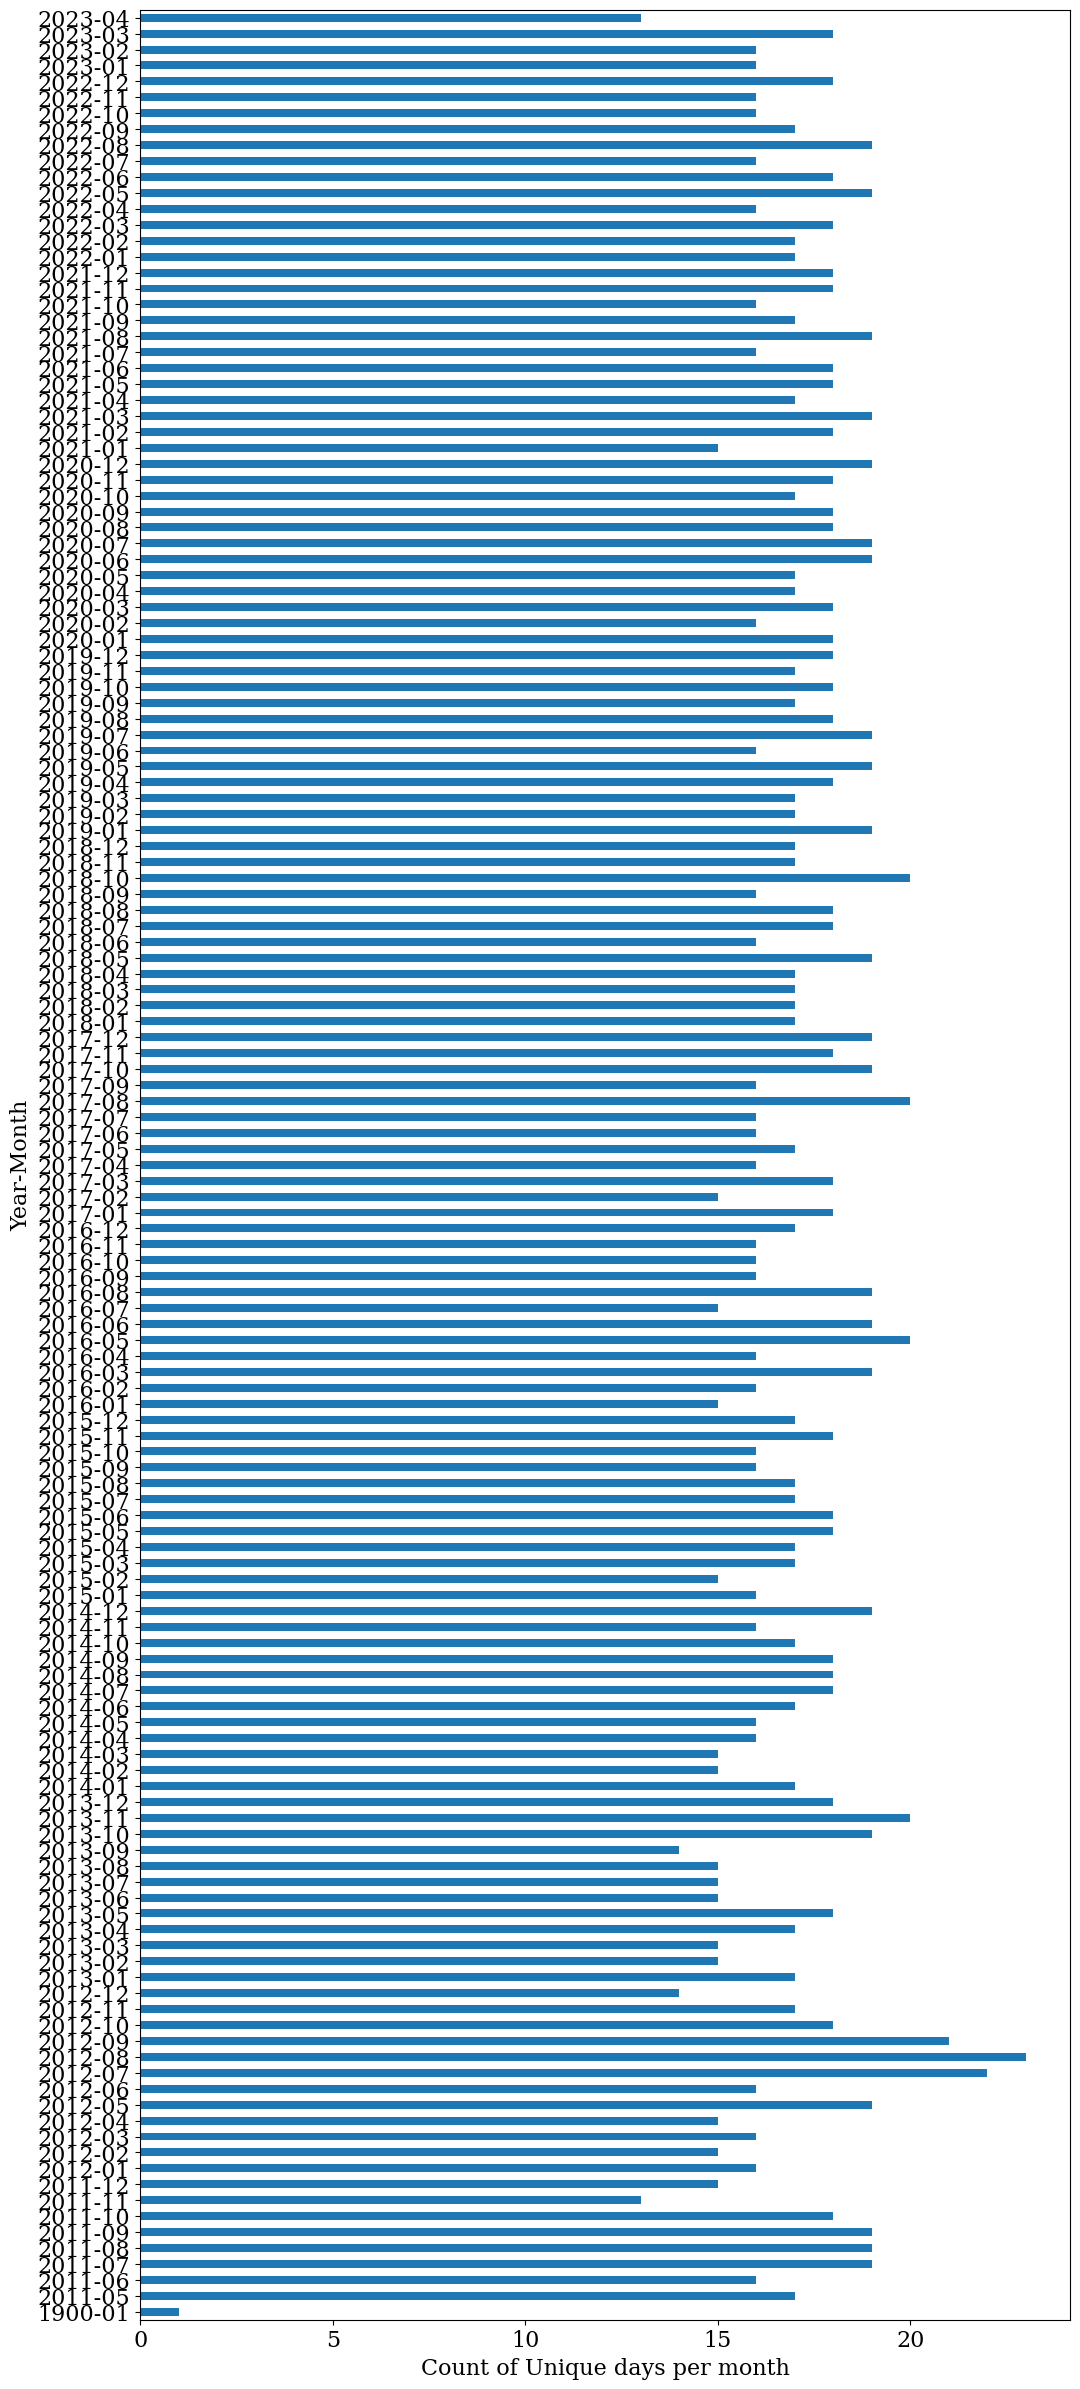

<IPython.core.display.Javascript object>

In [62]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [63]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
1900  1         1
2011  5        29
      6        55
      7        70
      8        54
               ..
2022  12       33
2023  1        36
      2        35
      3        35
      4        26
Name: size, Length: 145, dtype: int64


<IPython.core.display.Javascript object>

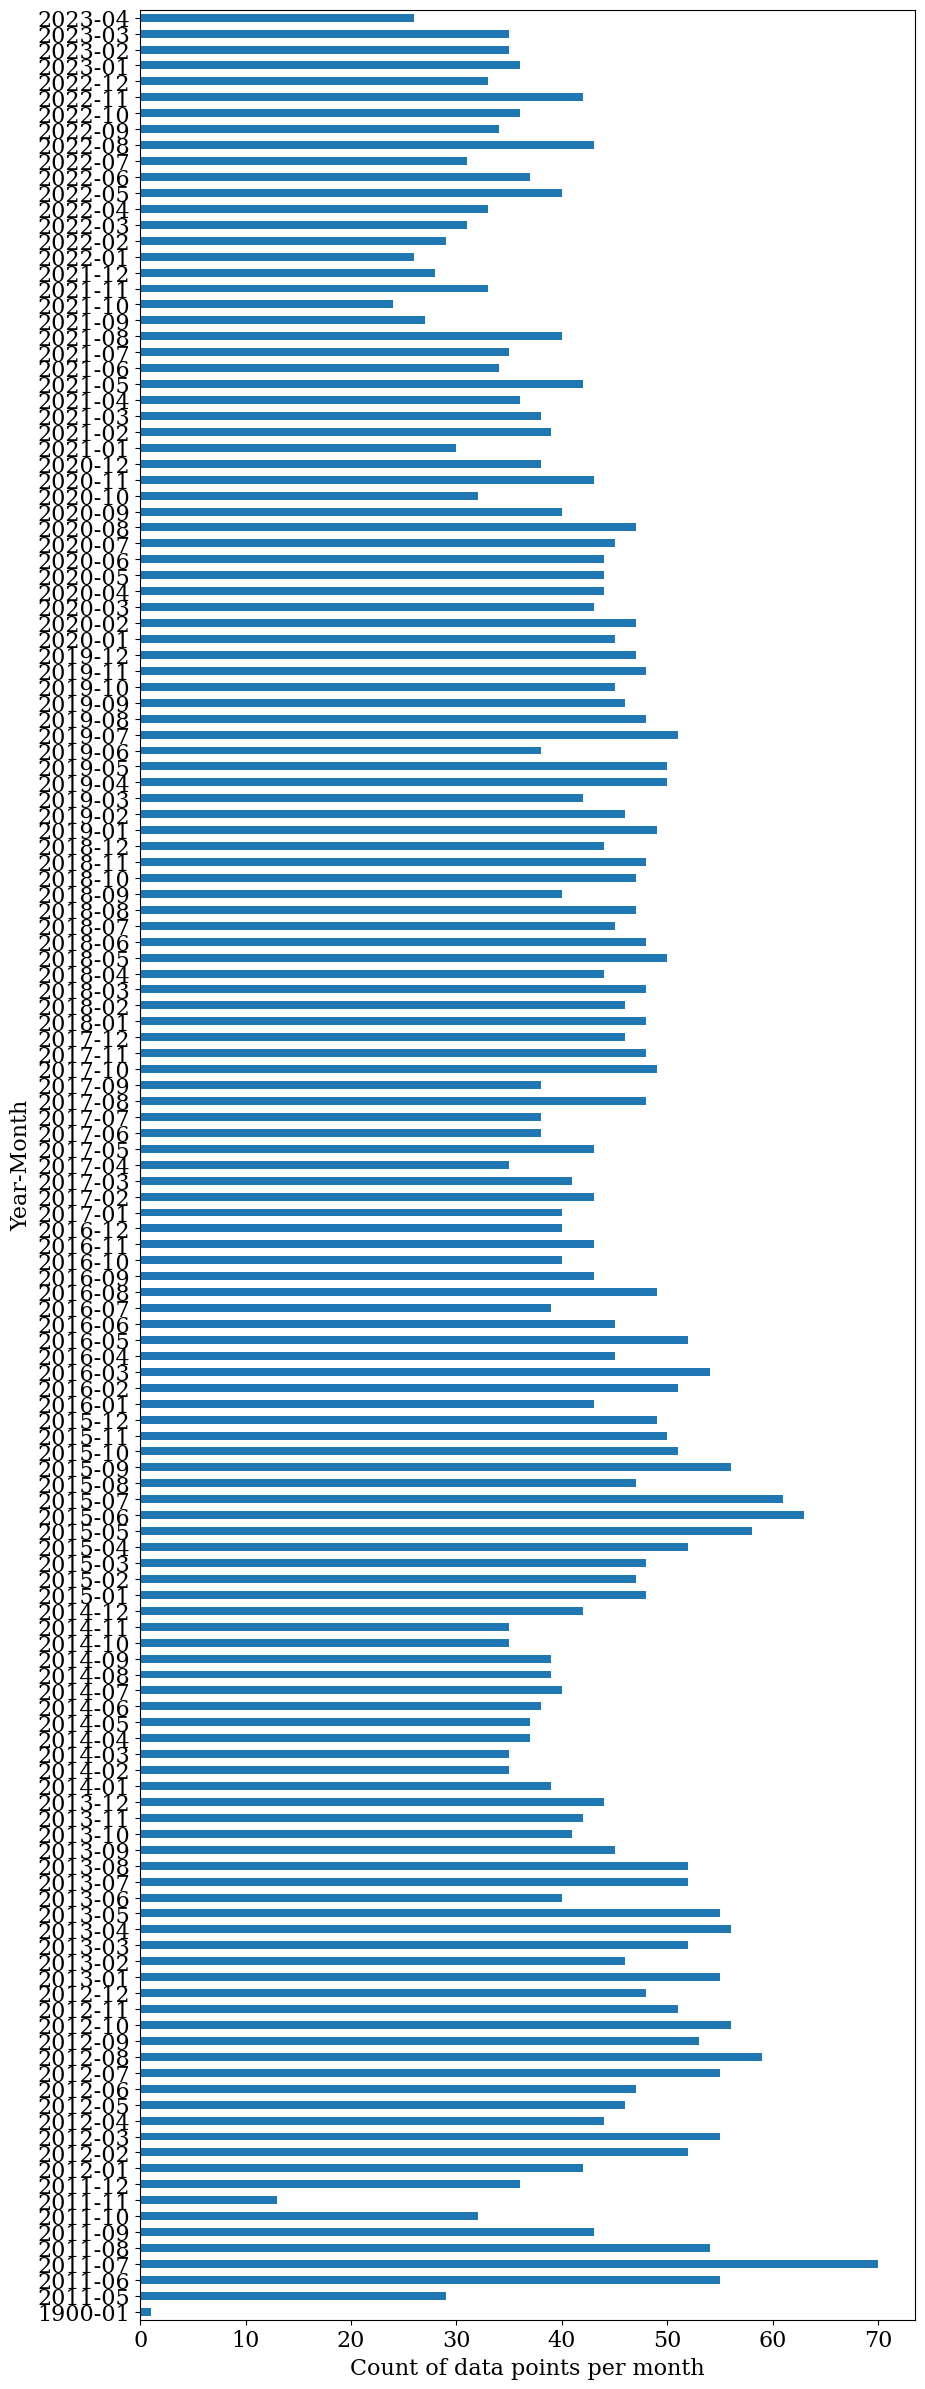

<IPython.core.display.Javascript object>

In [64]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [65]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

1900-1 has the minimum number of days with samples - 1
2011-7 has the maximum number of days with samples - 70


<IPython.core.display.Javascript object>

In [66]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{1900: 1, 2011: 41, 2012: 50, 2013: 48, 2014: 37, 2015: 52, 2016: 45, 2017: 42, 2018: 46, 2019: 46, 2020: 42, 2021: 33, 2022: 34, 2023: 33}

Mean number of observations - all years
42


<IPython.core.display.Javascript object>

In [67]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  2478.000000
mean      2.515335
std       0.937041
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000

<IPython.core.display.Javascript object>

In [68]:
day_counts[["DayCount"]].value_counts()

DayCount
2           1103
3            771
4            274
1            261
5             57
6             12
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [69]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
20    2011      6    6         6
32    2011      6   29         6
54    2011      8    2         6
832   2015      6    1         6
850   2015      7    3         6
900   2015     10    2         6
1018  2016      5    3         6
1434  2018      5    4         6
1495  2018      8   22         6
1645  2019      5    3         6
1750  2019     11    1         6
2172  2021     11    1         6

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

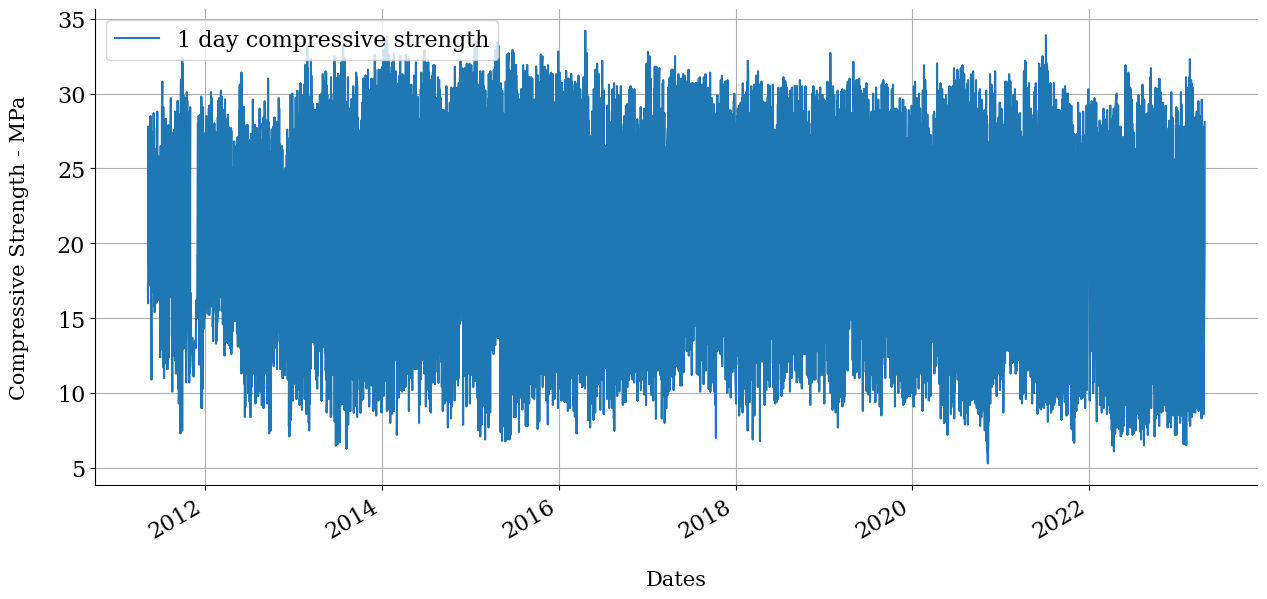

<IPython.core.display.Javascript object>

In [70]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

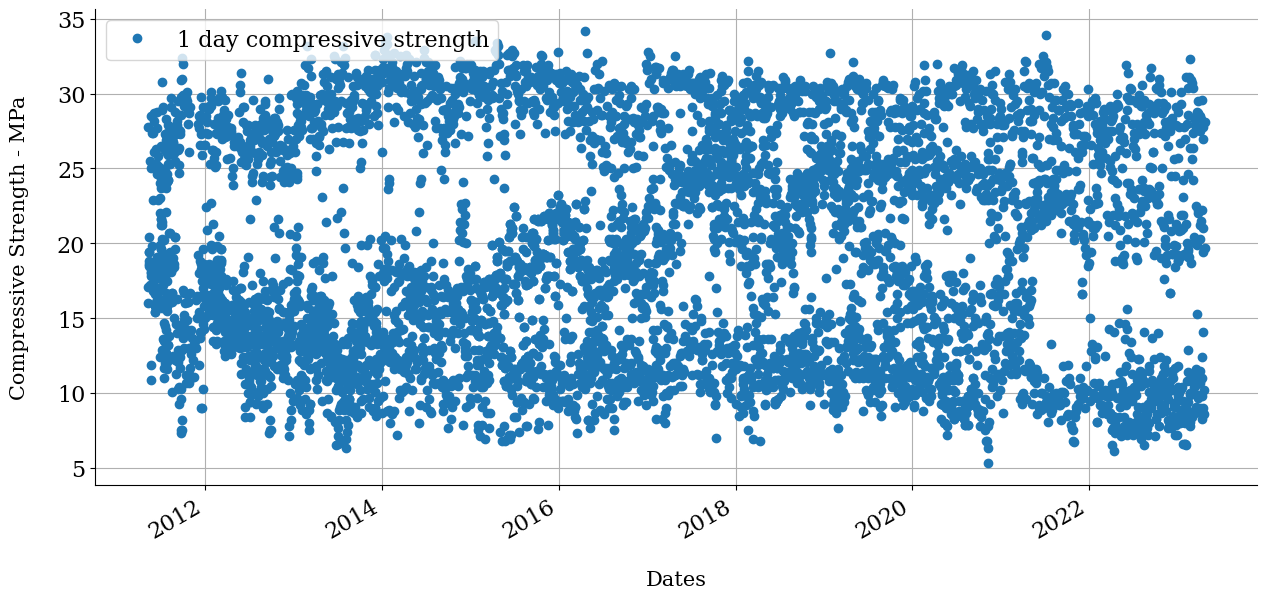

<IPython.core.display.Javascript object>

In [71]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 3 Days

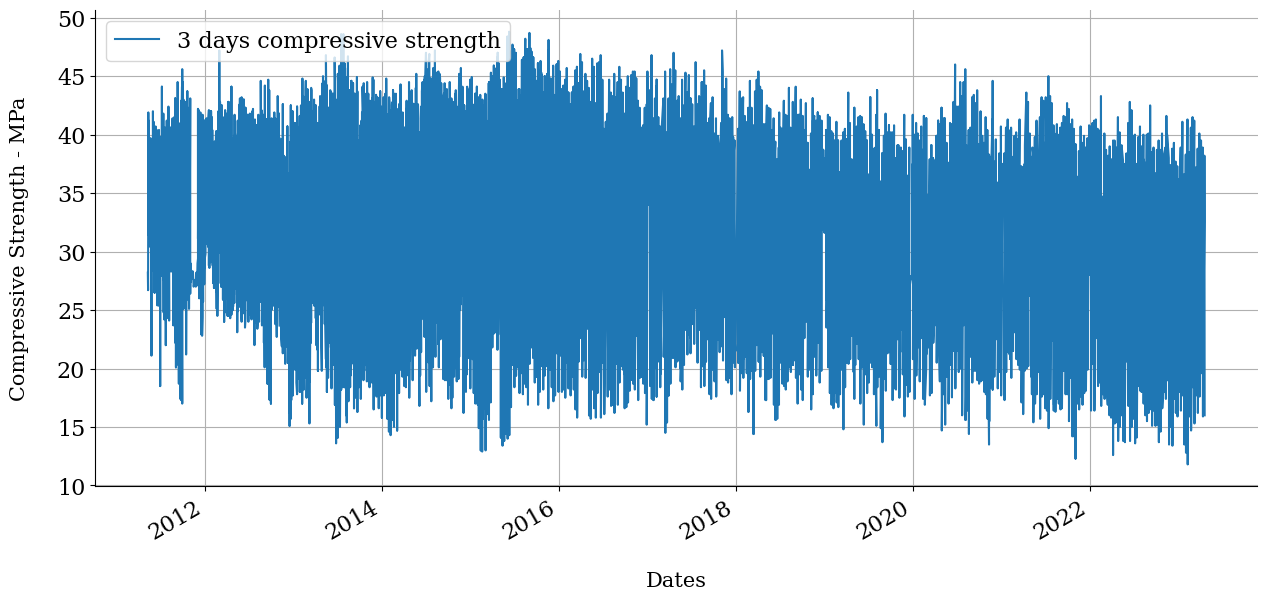

<IPython.core.display.Javascript object>

In [72]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 7 Days

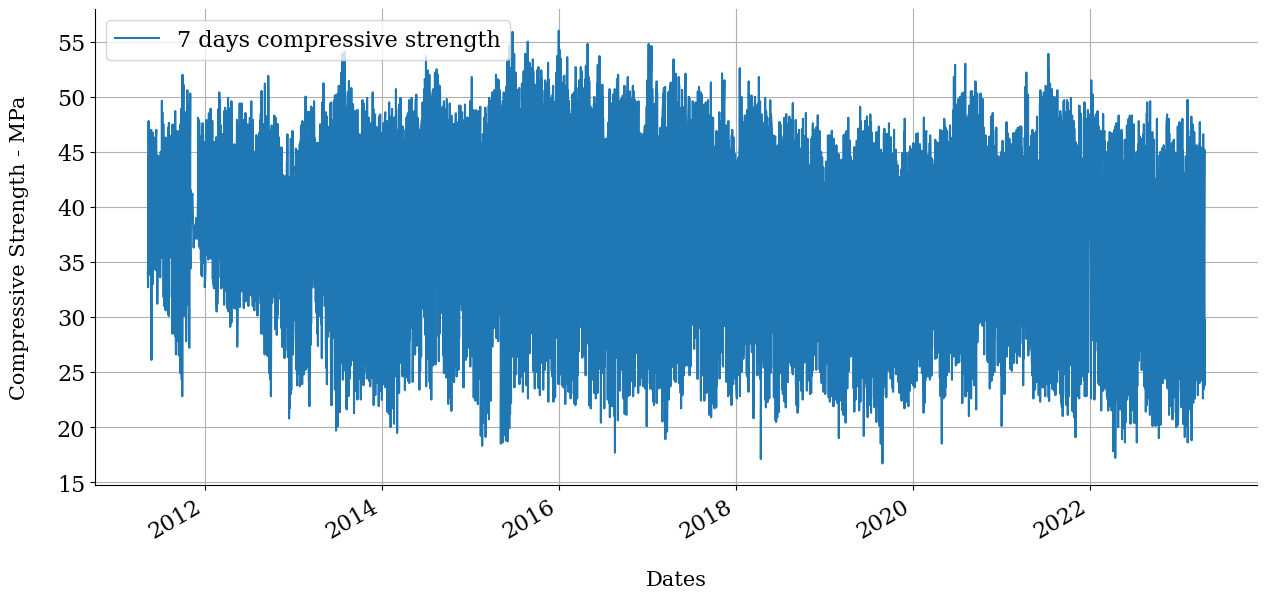

<IPython.core.display.Javascript object>

In [73]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 28 Days

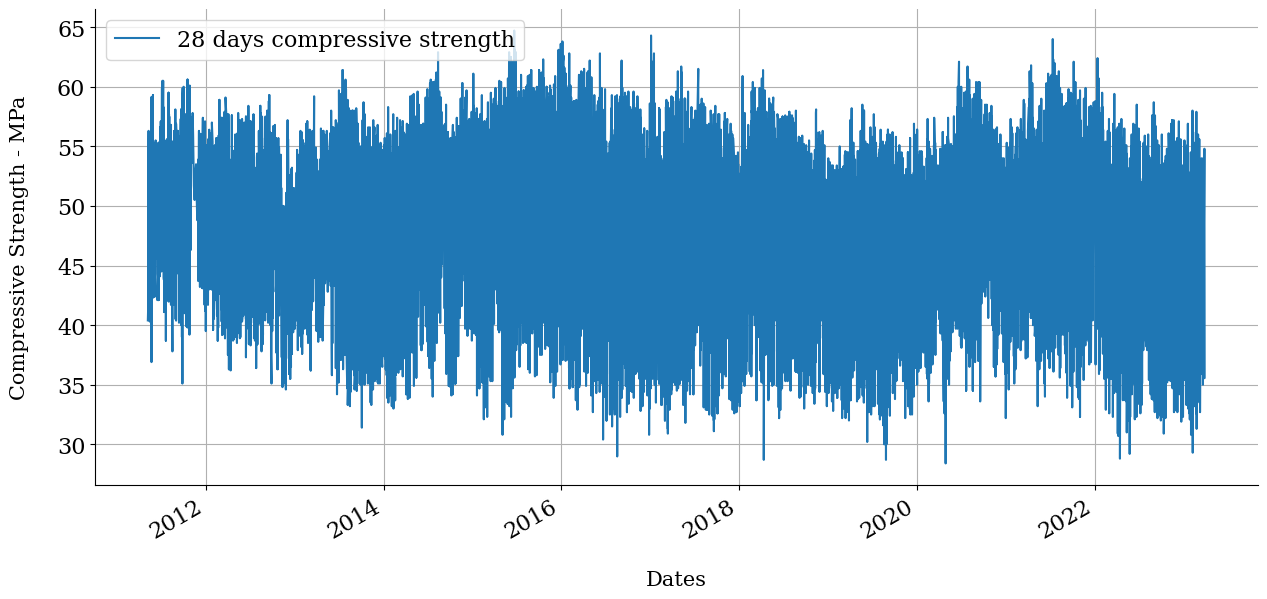

<IPython.core.display.Javascript object>

In [74]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()